# Dense intervalos - datos 5 dias

# Intervalos 1:

Cargamos los datos:

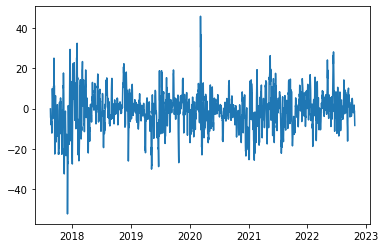

In [1]:
run 5dias-porintervalos1.ipynb

# Conjunto de datos 1

Construimos el modelo:

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.metrics import confusion_matrix,balanced_accuracy_score,classification_report

In [3]:
def subida(list):
    resultado = []
    for i in range(1,len(list)):
        if  (list)[i] > (list)[i-1]:
            resultado.append(1)
        else:
            resultado.append(0)
    return resultado

def acierto(list1,list2):
    sum = 0
    for i in range(0,len(list1)):
        if(list1[i]==list2[i]):
            sum = sum +1
    a = sum/len(list1)
    return a


### Dense RELU+ADAM

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

In [4]:
def build_model1(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(Dense(neurons, input_dim = 12, activation=activation_fun))
    model.add(Dense(round(neurons/2), activation=activation_fun))
    model.add(Dense(round(neurons/3), activation=activation_fun))
    model.add(Dense(round(neurons/4), activation=activation_fun))
    model.add(Dense(7, activation='softmax'))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['accuracy'])
    return model

Modelo 100 neuronas:

In [5]:
modeldense100 = build_model1(100,1,'relu','sparse_categorical_crossentropy','adam')
modeldense100.summary()
modeldense100.fit(trainX1, trainy1, epochs=100)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1300      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 33)                1683      
                                                                 
 dense_3 (Dense)             (None, 25)                850       
                                                                 
 dense_4 (Dense)             (None, 7)                 182       
                                                                 
Total params: 9,065
Trainable params: 9,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================] - 1

In [6]:
y_preddense100 = modeldense100.predict(testX1)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.2671957671957672
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[  0   0   0  32   0   0]
 [  0   0   0  69   0   0]
 [  0   0   0 109   0   0]
 [  0   0   0 101   0   0]
 [  0   0   0  49   0   0]
 [  0   0   0  18   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00        69
         3.0       0.00      0.00      0.00       109
         4.0       0.27      1.00      0.42       101
         5.0       0.00      0.00      0.00        49
         6.0       0.00      0.00      0.00        18

    accuracy                           0.27       378
   macro avg       0.04      0.17      0.07       378
weighted avg       0.07      0.27      0.11       378



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 64 neuronas

In [7]:
modeldense64 = build_model1(64,1,'relu','sparse_categorical_crossentropy','adam')
modeldense64.summary()
modeldense64.fit(trainX1, trainy1, epochs=100)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                832       
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 21)                693       
                                                                 
 dense_8 (Dense)             (None, 16)                352       
                                                                 
 dense_9 (Dense)             (None, 7)                 119       
                                                                 
Total params: 4,076
Trainable params: 4,076
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================] -

In [8]:
y_preddense64 = modeldense64.predict(testX1)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.25132275132275134
Tasa de aciertos balanceada regresión logística: 0.20
Matriz de confusión:
[[  3   2   0  26   0   1]
 [  0   2   0  65   0   2]
 [  0   1   0 101   0   7]
 [  0   0   0  86   0  15]
 [  0   0   0  31   0  18]
 [  0   0   0  14   0   4]]
              precision    recall  f1-score   support

         1.0       1.00      0.09      0.17        32
         2.0       0.40      0.03      0.05        69
         3.0       0.00      0.00      0.00       109
         4.0       0.27      0.85      0.41       101
         5.0       0.00      0.00      0.00        49
         6.0       0.09      0.22      0.12        18

    accuracy                           0.25       378
   macro avg       0.29      0.20      0.13       378
weighted avg       0.23      0.25      0.14       378



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 32 neuronas:

In [9]:
modeldense32 = build_model1(32,1,'relu','sparse_categorical_crossentropy','adam')
modeldense32.summary()
modeldense32.fit(trainX1, trainy1, epochs=100)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                416       
                                                                 
 dense_11 (Dense)            (None, 16)                528       
                                                                 
 dense_12 (Dense)            (None, 11)                187       
                                                                 
 dense_13 (Dense)            (None, 8)                 96        
                                                                 
 dense_14 (Dense)            (None, 7)                 63        
                                                                 
Total params: 1,290
Trainable params: 1,290
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================] -

In [10]:
y_preddense32 = modeldense32.predict(testX1)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.2671957671957672
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[  0   0   0  32   0   0]
 [  0   0   0  69   0   0]
 [  0   0   0 109   0   0]
 [  0   0   0 101   0   0]
 [  0   0   0  49   0   0]
 [  0   0   0  18   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00        69
         3.0       0.00      0.00      0.00       109
         4.0       0.27      1.00      0.42       101
         5.0       0.00      0.00      0.00        49
         6.0       0.00      0.00      0.00        18

    accuracy                           0.27       378
   macro avg       0.04      0.17      0.07       378
weighted avg       0.07      0.27      0.11       378



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

In [11]:
def build_model2(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(Dense(neurons, input_dim = 12, activation=activation_fun))
    model.add(Dense(round(neurons), activation=activation_fun))
    model.add(Dense(round(neurons/2), activation=activation_fun))
    model.add(Dense(round(neurons/2), activation=activation_fun))
    model.add(Dense(7, activation=activation_fun))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['accuracy'])
    return model

In [12]:
modeldense100 = build_model2(100,1,'relu','sparse_categorical_crossentropy','adam')
modeldense100.summary()
modeldense100.fit(trainX1, trainy1, epochs=100)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 100)               1300      
                                                                 
 dense_16 (Dense)            (None, 100)               10100     
                                                                 
 dense_17 (Dense)            (None, 50)                5050      
                                                                 
 dense_18 (Dense)            (None, 50)                2550      
                                                                 
 dense_19 (Dense)            (None, 7)                 357       
                                                                 
Total params: 19,357
Trainable params: 19,357
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================]

In [13]:
y_preddense100 = modeldense100.predict(testX1)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.12962962962962962
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[  0   0   0   0  32   0]
 [  0   0   0   0  69   0]
 [  0   0   0   0 109   0]
 [  0   0   0   0 101   0]
 [  0   0   0   0  49   0]
 [  0   0   0   0  18   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00        69
         3.0       0.00      0.00      0.00       109
         4.0       0.00      0.00      0.00       101
         5.0       0.13      1.00      0.23        49
         6.0       0.00      0.00      0.00        18

    accuracy                           0.13       378
   macro avg       0.02      0.17      0.04       378
weighted avg       0.02      0.13      0.03       378



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 64 neuronas

In [14]:
modeldense64 = build_model2(64,1,'relu','sparse_categorical_crossentropy','adam')
modeldense64.summary()
modeldense64.fit(trainX1, trainy1, epochs=100)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 64)                832       
                                                                 
 dense_21 (Dense)            (None, 64)                4160      
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 32)                1056      
                                                                 
 dense_24 (Dense)            (None, 7)                 231       
                                                                 
Total params: 8,359
Trainable params: 8,359
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================] -

In [15]:
y_preddense64 = modeldense64.predict(testX1)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.28835978835978837
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[  0   0  32   0   0   0]
 [  0   0  69   0   0   0]
 [  0   0 109   0   0   0]
 [  0   0 101   0   0   0]
 [  0   0  49   0   0   0]
 [  0   0  18   0   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00        69
         3.0       0.29      1.00      0.45       109
         4.0       0.00      0.00      0.00       101
         5.0       0.00      0.00      0.00        49
         6.0       0.00      0.00      0.00        18

    accuracy                           0.29       378
   macro avg       0.05      0.17      0.07       378
weighted avg       0.08      0.29      0.13       378



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 32 neuronas:

In [16]:
modeldense32 = build_model2(32,1,'relu','sparse_categorical_crossentropy','adam')
modeldense32.summary()
modeldense32.fit(trainX1, trainy1, epochs=100)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 32)                416       
                                                                 
 dense_26 (Dense)            (None, 32)                1056      
                                                                 
 dense_27 (Dense)            (None, 16)                528       
                                                                 
 dense_28 (Dense)            (None, 16)                272       
                                                                 
 dense_29 (Dense)            (None, 7)                 119       
                                                                 
Total params: 2,391
Trainable params: 2,391
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================] -

In [17]:
y_preddense32 = modeldense32.predict(testX1)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.2328042328042328
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[  0   0   0   0  32   0]
 [  0   0   0   0  69   0]
 [  0   0   0   0 109   0]
 [  0   0   0   0 101   0]
 [  0   0   0   0  49   0]
 [  0   0   0   0  18   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.19      0.62      0.30        69
         3.0       0.29      0.41      0.34       109
         4.0       0.00      0.00      0.00       101
         5.0       0.00      0.00      0.00        49
         6.0       0.00      0.00      0.00        18

    accuracy                           0.23       378
   macro avg       0.08      0.17      0.11       378
weighted avg       0.12      0.23      0.15       378



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### EXPERIMENTO 3: Modelo 10 capas

In [18]:
def build_model3(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(Dense(neurons, input_dim = 12, activation=activation_fun))
    model.add(Dense(round(neurons/2), activation=activation_fun))
    model.add(Dense(round(neurons/3), activation=activation_fun))
    model.add(Dense(round(neurons/4), activation=activation_fun))
    model.add(Dense(round(neurons/5), activation=activation_fun))
    model.add(Dense(round(neurons/6), activation=activation_fun))
    model.add(Dense(round(neurons/7), activation=activation_fun))
    model.add(Dense(round(neurons/8), activation=activation_fun))
    model.add(Dense(round(neurons/9), activation=activation_fun))
    model.add(Dense(7, activation=activation_fun))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['accuracy'])
    return model


Modelo 100 neuronas:

In [19]:
modeldense100 = build_model3(100,1,'relu','sparse_categorical_crossentropy','adam')
modeldense100.summary()
modeldense100.fit(trainX1, trainy1, epochs=100)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 100)               1300      
                                                                 
 dense_31 (Dense)            (None, 50)                5050      
                                                                 
 dense_32 (Dense)            (None, 33)                1683      
                                                                 
 dense_33 (Dense)            (None, 25)                850       
                                                                 
 dense_34 (Dense)            (None, 20)                520       
                                                                 
 dense_35 (Dense)            (None, 17)                357       
                                                                 
 dense_36 (Dense)            (None, 14)               

Epoch 65/100
48/48 [==============================] - 0s 3ms/step - loss: 11.2364 - accuracy: 0.1462
Epoch 66/100
48/48 [==============================] - 0s 3ms/step - loss: 11.2364 - accuracy: 0.1462
Epoch 67/100
48/48 [==============================] - 0s 3ms/step - loss: 11.2364 - accuracy: 0.1462
Epoch 68/100
48/48 [==============================] - 0s 3ms/step - loss: 11.2364 - accuracy: 0.1462
Epoch 69/100
48/48 [==============================] - 0s 3ms/step - loss: 11.2364 - accuracy: 0.1462
Epoch 70/100
48/48 [==============================] - 0s 3ms/step - loss: 11.2364 - accuracy: 0.1462
Epoch 71/100
48/48 [==============================] - 0s 3ms/step - loss: 11.2364 - accuracy: 0.1462
Epoch 72/100
48/48 [==============================] - 0s 3ms/step - loss: 11.2364 - accuracy: 0.1462
Epoch 73/100
48/48 [==============================] - 0s 3ms/step - loss: 11.2364 - accuracy: 0.1462
Epoch 74/100
48/48 [==============================] - 0s 2ms/step - loss: 11.2364 - accurac

In [20]:
y_preddense100 = modeldense100.predict(testX1)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.12962962962962962
Tasa de aciertos balanceada regresión logística: 0.15
Matriz de confusión:
[[ 0  0  2  0 30  0]
 [ 0  0  9  0 60  0]
 [ 0  0 10  0 99  0]
 [ 0  0 14  0 87  0]
 [ 0  0 10  0 39  0]
 [ 0  0  3  0 15  0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00        69
         3.0       0.21      0.09      0.13       109
         4.0       0.00      0.00      0.00       101
         5.0       0.12      0.80      0.21        49
         6.0       0.00      0.00      0.00        18

    accuracy                           0.13       378
   macro avg       0.05      0.15      0.06       378
weighted avg       0.08      0.13      0.06       378



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 64 neuronas:

In [21]:
modeldense64 = build_model3(64,1,'relu','sparse_categorical_crossentropy','adam')
modeldense64.summary()
modeldense64.fit(trainX1, trainy1, epochs=100)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 64)                832       
                                                                 
 dense_41 (Dense)            (None, 32)                2080      
                                                                 
 dense_42 (Dense)            (None, 21)                693       
                                                                 
 dense_43 (Dense)            (None, 16)                352       
                                                                 
 dense_44 (Dense)            (None, 13)                221       
                                                                 
 dense_45 (Dense)            (None, 11)                154       
                                                                 
 dense_46 (Dense)            (None, 9)                

In [22]:
y_preddense64 = modeldense64.predict(testX1)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.28835978835978837
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[  0   0  32   0   0   0]
 [  0   0  69   0   0   0]
 [  0   0 109   0   0   0]
 [  0   0 101   0   0   0]
 [  0   0  49   0   0   0]
 [  0   0  18   0   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00        69
         3.0       0.29      1.00      0.45       109
         4.0       0.00      0.00      0.00       101
         5.0       0.00      0.00      0.00        49
         6.0       0.00      0.00      0.00        18

    accuracy                           0.29       378
   macro avg       0.05      0.17      0.07       378
weighted avg       0.08      0.29      0.13       378



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 32 neuronas:

In [23]:
modeldense32 = build_model3(32,1,'relu','sparse_categorical_crossentropy','adam')
modeldense32.summary()
modeldense32.fit(trainX1, trainy1, epochs=100)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 32)                416       
                                                                 
 dense_51 (Dense)            (None, 16)                528       
                                                                 
 dense_52 (Dense)            (None, 11)                187       
                                                                 
 dense_53 (Dense)            (None, 8)                 96        
                                                                 
 dense_54 (Dense)            (None, 6)                 54        
                                                                 
 dense_55 (Dense)            (None, 5)                 35        
                                                                 
 dense_56 (Dense)            (None, 5)                

In [24]:
y_preddense32 = modeldense32.predict(testX1)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.0
Tasa de aciertos balanceada regresión logística: 0.00
Matriz de confusión:
[[ 0  0  2  0 30  0]
 [ 0  0  9  0 60  0]
 [ 0  0 10  0 99  0]
 [ 0  0 14  0 87  0]
 [ 0  0 10  0 39  0]
 [ 0  0  3  0 15  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       0.0
         1.0       0.00      0.00      0.00      32.0
         2.0       0.00      0.00      0.00      69.0
         3.0       0.00      0.00      0.00     109.0
         4.0       0.00      0.00      0.00     101.0
         5.0       0.00      0.00      0.00      49.0
         6.0       0.00      0.00      0.00      18.0

    accuracy                           0.00     378.0
   macro avg       0.00      0.00      0.00     378.0
weighted avg       0.00      0.00      0.00     378.0



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

### Dense RELU+ADAGRAD

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

Modelo 100 neuronas:

In [25]:
modeldense100 = build_model1(100,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense100.summary()
modeldense100.fit(trainX1, trainy1, epochs=100)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 100)               1300      
                                                                 
 dense_61 (Dense)            (None, 50)                5050      
                                                                 
 dense_62 (Dense)            (None, 33)                1683      
                                                                 
 dense_63 (Dense)            (None, 25)                850       
                                                                 
 dense_64 (Dense)            (None, 7)                 182       
                                                                 
Total params: 9,065
Trainable params: 9,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================] -

In [26]:
y_preddense100 = modeldense100.predict(testX1)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.3439153439153439
Tasa de aciertos balanceada regresión logística: 0.35
Matriz de confusión:
[[12 14  4  1  0  1]
 [13 21 13 21  0  1]
 [11 16 22 51  7  2]
 [12  3 13 51 17  5]
 [ 1  0  3 15 17 13]
 [ 1  0  2  3  5  7]]
              precision    recall  f1-score   support

         1.0       0.24      0.38      0.29        32
         2.0       0.39      0.30      0.34        69
         3.0       0.39      0.20      0.27       109
         4.0       0.36      0.50      0.42       101
         5.0       0.37      0.35      0.36        49
         6.0       0.24      0.39      0.30        18

    accuracy                           0.34       378
   macro avg       0.33      0.35      0.33       378
weighted avg       0.36      0.34      0.34       378



Modelo 64 neuronas

In [27]:
modeldense64 = build_model1(64,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense64.summary()
modeldense64.fit(trainX1, trainy1, epochs=100)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 64)                832       
                                                                 
 dense_66 (Dense)            (None, 32)                2080      
                                                                 
 dense_67 (Dense)            (None, 21)                693       
                                                                 
 dense_68 (Dense)            (None, 16)                352       
                                                                 
 dense_69 (Dense)            (None, 7)                 119       
                                                                 
Total params: 4,076
Trainable params: 4,076
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================] 

In [28]:
y_preddense64 = modeldense64.predict(testX1)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.2619047619047619
Tasa de aciertos balanceada regresión logística: 0.28
Matriz de confusión:
[[19  5  7  1  0  0]
 [17 11 28  7  2  4]
 [17 26 39 17  5  5]
 [14 20 26 15 15 11]
 [ 6  7  4 14 11  7]
 [ 1  1  1  4  7  4]]
              precision    recall  f1-score   support

         1.0       0.26      0.59      0.36        32
         2.0       0.16      0.16      0.16        69
         3.0       0.37      0.36      0.36       109
         4.0       0.26      0.15      0.19       101
         5.0       0.28      0.22      0.25        49
         6.0       0.13      0.22      0.16        18

    accuracy                           0.26       378
   macro avg       0.24      0.28      0.25       378
weighted avg       0.27      0.26      0.25       378



Modelo 32 neuronas:

In [29]:
modeldense32 = build_model1(32,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense32.summary()
modeldense32.fit(trainX1, trainy1, epochs=100)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 32)                416       
                                                                 
 dense_71 (Dense)            (None, 16)                528       
                                                                 
 dense_72 (Dense)            (None, 11)                187       
                                                                 
 dense_73 (Dense)            (None, 8)                 96        
                                                                 
 dense_74 (Dense)            (None, 7)                 63        
                                                                 
Total params: 1,290
Trainable params: 1,290
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================] 

In [30]:
y_preddense32 = modeldense32.predict(testX1)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.0582010582010582
Tasa de aciertos balanceada regresión logística: 0.16
Matriz de confusión:
[[12 14  4  1  0  1]
 [13 21 13 21  0  1]
 [11 16 22 51  7  2]
 [12  3 13 51 17  5]
 [ 1  0  3 15 17 13]
 [ 1  0  2  3  5  7]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.25      0.12      0.17        32
         2.0       0.00      0.00      0.00        69
         3.0       0.08      0.01      0.02       109
         4.0       0.18      0.02      0.04       101
         5.0       0.00      0.00      0.00        49
         6.0       0.05      0.83      0.09        18

    accuracy                           0.06       378
   macro avg       0.08      0.14      0.04       378
weighted avg       0.10      0.06      0.03       378



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

In [31]:
modeldense100 = build_model2(100,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense100.summary()
modeldense100.fit(trainX1, trainy1, epochs=100)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 100)               1300      
                                                                 
 dense_76 (Dense)            (None, 100)               10100     
                                                                 
 dense_77 (Dense)            (None, 50)                5050      
                                                                 
 dense_78 (Dense)            (None, 50)                2550      
                                                                 
 dense_79 (Dense)            (None, 7)                 357       
                                                                 
Total params: 19,357
Trainable params: 19,357
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================

In [32]:
y_preddense100 = modeldense100.predict(testX1)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.12962962962962962
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[  0   0   0   0  32   0]
 [  0   0   0   0  69   0]
 [  0   0   0   0 109   0]
 [  0   0   0   0 101   0]
 [  0   0   0   0  49   0]
 [  0   0   0   0  18   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00        69
         3.0       0.00      0.00      0.00       109
         4.0       0.00      0.00      0.00       101
         5.0       0.13      1.00      0.23        49
         6.0       0.00      0.00      0.00        18

    accuracy                           0.13       378
   macro avg       0.02      0.17      0.04       378
weighted avg       0.02      0.13      0.03       378



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 64 neuronas

In [33]:
modeldense64 = build_model2(64,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense64.summary()
modeldense64.fit(trainX1, trainy1, epochs=100)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 64)                832       
                                                                 
 dense_81 (Dense)            (None, 64)                4160      
                                                                 
 dense_82 (Dense)            (None, 32)                2080      
                                                                 
 dense_83 (Dense)            (None, 32)                1056      
                                                                 
 dense_84 (Dense)            (None, 7)                 231       
                                                                 
Total params: 8,359
Trainable params: 8,359
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================] 

In [34]:
y_preddense64 = modeldense64.predict(testX1)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.047619047619047616
Tasa de aciertos balanceada regresión logística: 0.09
Matriz de confusión:
[[ 0  0  0  0  0  0  0]
 [14 18  0  0  0  0  0]
 [16 53  0  0  0  0  0]
 [19 90  0  0  0  0  0]
 [18 83  0  0  0  0  0]
 [ 9 40  0  0  0  0  0]
 [ 0 18  0  0  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.06      0.56      0.11        32
         2.0       0.00      0.00      0.00        69
         3.0       0.00      0.00      0.00       109
         4.0       0.00      0.00      0.00       101
         5.0       0.00      0.00      0.00        49
         6.0       0.00      0.00      0.00        18

    accuracy                           0.05       378
   macro avg       0.01      0.08      0.02       378
weighted avg       0.01      0.05      0.01       378



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 32 neuronas:

In [35]:
modeldense32 = build_model2(32,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense32.summary()
modeldense32.fit(trainX1, trainy1, epochs=100)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_85 (Dense)            (None, 32)                416       
                                                                 
 dense_86 (Dense)            (None, 32)                1056      
                                                                 
 dense_87 (Dense)            (None, 16)                528       
                                                                 
 dense_88 (Dense)            (None, 16)                272       
                                                                 
 dense_89 (Dense)            (None, 7)                 119       
                                                                 
Total params: 2,391
Trainable params: 2,391
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================] 

In [36]:
y_preddense32 = modeldense32.predict(testX1)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.0
Tasa de aciertos balanceada regresión logística: 0.00
Matriz de confusión:
[[  0   0   0   0  32   0]
 [  0   0   0   0  69   0]
 [  0   0   0   0 109   0]
 [  0   0   0   0 101   0]
 [  0   0   0   0  49   0]
 [  0   0   0   0  18   0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       0.0
         1.0       0.00      0.00      0.00      32.0
         2.0       0.00      0.00      0.00      69.0
         3.0       0.00      0.00      0.00     109.0
         4.0       0.00      0.00      0.00     101.0
         5.0       0.00      0.00      0.00      49.0
         6.0       0.00      0.00      0.00      18.0

    accuracy                           0.00     378.0
   macro avg       0.00      0.00      0.00     378.0
weighted avg       0.00      0.00      0.00     378.0



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

### EXPERIMENTO 3: Modelo 10 capas

Modelo 100 neuronas:

In [37]:
modeldense100 = build_model3(100,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense100.summary()
modeldense100.fit(trainX1, trainy1, epochs=100)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 100)               1300      
                                                                 
 dense_91 (Dense)            (None, 50)                5050      
                                                                 
 dense_92 (Dense)            (None, 33)                1683      
                                                                 
 dense_93 (Dense)            (None, 25)                850       
                                                                 
 dense_94 (Dense)            (None, 20)                520       
                                                                 
 dense_95 (Dense)            (None, 17)                357       
                                                                 
 dense_96 (Dense)            (None, 14)              

In [38]:
y_preddense100 = modeldense100.predict(testX1)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.0
Tasa de aciertos balanceada regresión logística: 0.00
Matriz de confusión:
[[  0   0   0   0   0   0   0]
 [ 32   0   0   0   0   0   0]
 [ 69   0   0   0   0   0   0]
 [109   0   0   0   0   0   0]
 [101   0   0   0   0   0   0]
 [ 49   0   0   0   0   0   0]
 [ 18   0   0   0   0   0   0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       0.0
         1.0       0.00      0.00      0.00      32.0
         2.0       0.00      0.00      0.00      69.0
         3.0       0.00      0.00      0.00     109.0
         4.0       0.00      0.00      0.00     101.0
         5.0       0.00      0.00      0.00      49.0
         6.0       0.00      0.00      0.00      18.0

    accuracy                           0.00     378.0
   macro avg       0.00      0.00      0.00     378.0
weighted avg       0.00      0.00      0.00     378.0



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 64 neuronas:

In [39]:
modeldense64 = build_model3(64,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense64.summary()
modeldense64.fit(trainX1, trainy1, epochs=100)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_100 (Dense)           (None, 64)                832       
                                                                 
 dense_101 (Dense)           (None, 32)                2080      
                                                                 
 dense_102 (Dense)           (None, 21)                693       
                                                                 
 dense_103 (Dense)           (None, 16)                352       
                                                                 
 dense_104 (Dense)           (None, 13)                221       
                                                                 
 dense_105 (Dense)           (None, 11)                154       
                                                                 
 dense_106 (Dense)           (None, 9)               

In [40]:
y_preddense64 = modeldense64.predict(testX1)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.20634920634920634
Tasa de aciertos balanceada regresión logística: 0.18
Matriz de confusión:
[[ 0  0  0  8 24  0]
 [ 0  0  0 23 46  0]
 [ 0  0  0 40 69  0]
 [ 0  0  0 46 55  0]
 [ 0  0  0 17 32  0]
 [ 0  0  0  9  9  0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00        69
         3.0       0.00      0.00      0.00       109
         4.0       0.32      0.46      0.38       101
         5.0       0.14      0.65      0.23        49
         6.0       0.00      0.00      0.00        18

    accuracy                           0.21       378
   macro avg       0.08      0.18      0.10       378
weighted avg       0.10      0.21      0.13       378



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 32 neuronas:

In [41]:
modeldense32 = build_model3(32,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense32.summary()
modeldense32.fit(trainX1, trainy1, epochs=100)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_110 (Dense)           (None, 32)                416       
                                                                 
 dense_111 (Dense)           (None, 16)                528       
                                                                 
 dense_112 (Dense)           (None, 11)                187       
                                                                 
 dense_113 (Dense)           (None, 8)                 96        
                                                                 
 dense_114 (Dense)           (None, 6)                 54        
                                                                 
 dense_115 (Dense)           (None, 5)                 35        
                                                                 
 dense_116 (Dense)           (None, 5)               

Epoch 65/100
48/48 [==============================] - 0s 3ms/step - loss: 13.7841 - accuracy: 0.1078
Epoch 66/100
48/48 [==============================] - 0s 3ms/step - loss: 13.7842 - accuracy: 0.1078
Epoch 67/100
48/48 [==============================] - 0s 3ms/step - loss: 13.7842 - accuracy: 0.1078
Epoch 68/100
48/48 [==============================] - 0s 3ms/step - loss: 13.7841 - accuracy: 0.1078
Epoch 69/100
48/48 [==============================] - 0s 2ms/step - loss: 13.7842 - accuracy: 0.1078
Epoch 70/100
48/48 [==============================] - 0s 2ms/step - loss: 13.7841 - accuracy: 0.1078
Epoch 71/100
48/48 [==============================] - 0s 2ms/step - loss: 13.7842 - accuracy: 0.1078
Epoch 72/100
48/48 [==============================] - 0s 3ms/step - loss: 13.7842 - accuracy: 0.1078
Epoch 73/100
48/48 [==============================] - 0s 2ms/step - loss: 13.7842 - accuracy: 0.1078
Epoch 74/100
48/48 [==============================] - 0s 2ms/step - loss: 13.7842 - accurac

In [42]:
y_preddense32 = modeldense32.predict(testX1)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.18253968253968253
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[  0   0   0   0   0   0   0]
 [ 32   0   0   0   0   0   0]
 [ 69   0   0   0   0   0   0]
 [109   0   0   0   0   0   0]
 [101   0   0   0   0   0   0]
 [ 49   0   0   0   0   0   0]
 [ 18   0   0   0   0   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.18      1.00      0.31        69
         3.0       0.00      0.00      0.00       109
         4.0       0.00      0.00      0.00       101
         5.0       0.00      0.00      0.00        49
         6.0       0.00      0.00      0.00        18

    accuracy                           0.18       378
   macro avg       0.03      0.17      0.05       378
weighted avg       0.03      0.18      0.06       378



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Conjunto de datos 2

Construimos el modelo:

### Dense RELU+ADAM

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

In [43]:
def build_model1(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(Dense(neurons, input_dim = 22, activation=activation_fun))
    model.add(Dense(round(neurons/2), activation=activation_fun))
    model.add(Dense(round(neurons/3), activation=activation_fun))
    model.add(Dense(round(neurons/4), activation=activation_fun))
    model.add(Dense(7, activation='softmax'))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['accuracy'])
    return model

Modelo 100 neuronas:

In [44]:
modeldense100 = build_model1(100,1,'relu','sparse_categorical_crossentropy','adam')
modeldense100.summary()
modeldense100.fit(trainX2, trainy2, epochs=100)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 100)               2300      
                                                                 
 dense_121 (Dense)           (None, 50)                5050      
                                                                 
 dense_122 (Dense)           (None, 33)                1683      
                                                                 
 dense_123 (Dense)           (None, 25)                850       
                                                                 
 dense_124 (Dense)           (None, 7)                 182       
                                                                 
Total params: 10,065
Trainable params: 10,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================

In [45]:
y_preddense100 = modeldense100.predict(testX2)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.3787465940054496
Tasa de aciertos balanceada regresión logística: 0.38
Matriz de confusión:
[[16  6  9  1  0  0]
 [ 2  8 41 16  2  0]
 [ 0  0 37 60  9  1]
 [ 0  1 10 50 30  8]
 [ 0  0  1  9 23 11]
 [ 0  0  0  3  8  5]]
              precision    recall  f1-score   support

         1.0       0.89      0.50      0.64        32
         2.0       0.53      0.12      0.19        69
         3.0       0.38      0.35      0.36       107
         4.0       0.36      0.51      0.42        99
         5.0       0.32      0.52      0.40        44
         6.0       0.20      0.31      0.24        16

    accuracy                           0.38       367
   macro avg       0.45      0.38      0.38       367
weighted avg       0.43      0.38      0.37       367



Modelo 64 neuronas

In [46]:
modeldense64 = build_model1(64,1,'relu','sparse_categorical_crossentropy','adam')
modeldense64.summary()
modeldense64.fit(trainX2, trainy2, epochs=100)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_125 (Dense)           (None, 64)                1472      
                                                                 
 dense_126 (Dense)           (None, 32)                2080      
                                                                 
 dense_127 (Dense)           (None, 21)                693       
                                                                 
 dense_128 (Dense)           (None, 16)                352       
                                                                 
 dense_129 (Dense)           (None, 7)                 119       
                                                                 
Total params: 4,716
Trainable params: 4,716
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [47]:
y_preddense64 = modeldense64.predict(testX2)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.26975476839237056
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[  0   0   0  32   0   0]
 [  0   0   0  69   0   0]
 [  0   0   0 107   0   0]
 [  0   0   0  99   0   0]
 [  0   0   0  44   0   0]
 [  0   0   0  16   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00        69
         3.0       0.00      0.00      0.00       107
         4.0       0.27      1.00      0.42        99
         5.0       0.00      0.00      0.00        44
         6.0       0.00      0.00      0.00        16

    accuracy                           0.27       367
   macro avg       0.04      0.17      0.07       367
weighted avg       0.07      0.27      0.11       367



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 32 neuronas:

In [48]:
modeldense32 = build_model1(32,1,'relu','sparse_categorical_crossentropy','adam')
modeldense32.summary()
modeldense32.fit(trainX2, trainy2, epochs=100)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_130 (Dense)           (None, 32)                736       
                                                                 
 dense_131 (Dense)           (None, 16)                528       
                                                                 
 dense_132 (Dense)           (None, 11)                187       
                                                                 
 dense_133 (Dense)           (None, 8)                 96        
                                                                 
 dense_134 (Dense)           (None, 7)                 63        
                                                                 
Total params: 1,610
Trainable params: 1,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

46/46 [==============================] - 0s 2ms/step - loss: 1.7407 - accuracy: 0.2670
Epoch 73/100
46/46 [==============================] - 0s 2ms/step - loss: 1.7403 - accuracy: 0.2670
Epoch 74/100
46/46 [==============================] - 0s 2ms/step - loss: 1.7398 - accuracy: 0.2670
Epoch 75/100
46/46 [==============================] - 0s 2ms/step - loss: 1.7394 - accuracy: 0.2670
Epoch 76/100
46/46 [==============================] - 0s 3ms/step - loss: 1.7390 - accuracy: 0.2670
Epoch 77/100
46/46 [==============================] - 0s 2ms/step - loss: 1.7385 - accuracy: 0.2670
Epoch 78/100
46/46 [==============================] - 0s 2ms/step - loss: 1.7383 - accuracy: 0.2670
Epoch 79/100
46/46 [==============================] - 0s 2ms/step - loss: 1.7378 - accuracy: 0.2670
Epoch 80/100
46/46 [==============================] - 0s 2ms/step - loss: 1.7374 - accuracy: 0.2670
Epoch 81/100
46/46 [==============================] - 0s 2ms/step - loss: 1.7371 - accuracy: 0.2670
Epoch 82/100


In [49]:
y_preddense32 = modeldense32.predict(testX2)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.2506811989100817
Tasa de aciertos balanceada regresión logística: 0.15
Matriz de confusión:
[[16  6  9  1  0  0]
 [ 2  8 41 16  2  0]
 [ 0  0 37 60  9  1]
 [ 0  1 10 50 30  8]
 [ 0  0  1  9 23 11]
 [ 0  0  0  3  8  5]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00        69
         3.0       0.00      0.00      0.00       107
         4.0       0.27      0.93      0.42        99
         5.0       0.00      0.00      0.00        44
         6.0       0.00      0.00      0.00        16

    accuracy                           0.25       367
   macro avg       0.05      0.15      0.07       367
weighted avg       0.07      0.25      0.11       367



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

In [50]:
def build_model2(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(Dense(neurons, input_dim = 22, activation=activation_fun))
    model.add(Dense(round(neurons), activation=activation_fun))
    model.add(Dense(round(neurons/2), activation=activation_fun))
    model.add(Dense(round(neurons/2), activation=activation_fun))
    model.add(Dense(7, activation=activation_fun))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['accuracy'])
    return model

In [51]:
modeldense100 = build_model2(100,1,'relu','sparse_categorical_crossentropy','adam')
modeldense100.summary()
modeldense100.fit(trainX2, trainy2, epochs=100)

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_135 (Dense)           (None, 100)               2300      
                                                                 
 dense_136 (Dense)           (None, 100)               10100     
                                                                 
 dense_137 (Dense)           (None, 50)                5050      
                                                                 
 dense_138 (Dense)           (None, 50)                2550      
                                                                 
 dense_139 (Dense)           (None, 7)                 357       
                                                                 
Total params: 20,357
Trainable params: 20,357
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================

In [52]:
y_preddense100 = modeldense100.predict(testX2)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.13896457765667575
Tasa de aciertos balanceada regresión logística: 0.09
Matriz de confusión:
[[ 0  0  0  0  0  0  0]
 [19  0  0  0 13  0  0]
 [40  0  0  0 29  0  0]
 [60  0  0  0 47  0  0]
 [48  0  0  0 51  0  0]
 [27  0  0  0 17  0  0]
 [ 6  0  0  0 10  0  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00        69
         3.0       0.00      0.00      0.00       107
         4.0       0.31      0.52      0.38        99
         5.0       0.00      0.00      0.00        44
         6.0       0.00      0.00      0.00        16

    accuracy                           0.14       367
   macro avg       0.04      0.07      0.05       367
weighted avg       0.08      0.14      0.10       367



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 64 neuronas

In [53]:
modeldense64 = build_model2(64,1,'relu','sparse_categorical_crossentropy','adam')
modeldense64.summary()
modeldense64.fit(trainX2, trainy2, epochs=100)

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_140 (Dense)           (None, 64)                1472      
                                                                 
 dense_141 (Dense)           (None, 64)                4160      
                                                                 
 dense_142 (Dense)           (None, 32)                2080      
                                                                 
 dense_143 (Dense)           (None, 32)                1056      
                                                                 
 dense_144 (Dense)           (None, 7)                 231       
                                                                 
Total params: 8,999
Trainable params: 8,999
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [54]:
y_preddense64 = modeldense64.predict(testX2)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.08719346049046321
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[ 32   0   0   0   0   0]
 [ 69   0   0   0   0   0]
 [107   0   0   0   0   0]
 [ 99   0   0   0   0   0]
 [ 44   0   0   0   0   0]
 [ 16   0   0   0   0   0]]
              precision    recall  f1-score   support

         1.0       0.09      1.00      0.16        32
         2.0       0.00      0.00      0.00        69
         3.0       0.00      0.00      0.00       107
         4.0       0.00      0.00      0.00        99
         5.0       0.00      0.00      0.00        44
         6.0       0.00      0.00      0.00        16

    accuracy                           0.09       367
   macro avg       0.01      0.17      0.03       367
weighted avg       0.01      0.09      0.01       367



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 32 neuronas:

In [55]:
modeldense32 = build_model2(32,1,'relu','sparse_categorical_crossentropy','adam')
modeldense32.summary()
modeldense32.fit(trainX2, trainy2, epochs=100)

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_145 (Dense)           (None, 32)                736       
                                                                 
 dense_146 (Dense)           (None, 32)                1056      
                                                                 
 dense_147 (Dense)           (None, 16)                528       
                                                                 
 dense_148 (Dense)           (None, 16)                272       
                                                                 
 dense_149 (Dense)           (None, 7)                 119       
                                                                 
Total params: 2,711
Trainable params: 2,711
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [56]:
y_preddense32 = modeldense32.predict(testX2)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.01634877384196185
Tasa de aciertos balanceada regresión logística: 0.06
Matriz de confusión:
[[ 0  0  0  0  0  0  0]
 [19  0  0  0 13  0  0]
 [40  0  0  0 29  0  0]
 [60  0  0  0 47  0  0]
 [48  0  0  0 51  0  0]
 [27  0  0  0 17  0  0]
 [ 6  0  0  0 10  0  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00        69
         3.0       0.00      0.00      0.00       107
         4.0       0.00      0.00      0.00        99
         5.0       0.00      0.00      0.00        44
         6.0       0.03      0.38      0.06        16

    accuracy                           0.02       367
   macro avg       0.00      0.05      0.01       367
weighted avg       0.00      0.02      0.00       367



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

### EXPERIMENTO 3: Modelo 10 capas

In [57]:
def build_model3(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(Dense(neurons, input_dim = 22, activation=activation_fun))
    model.add(Dense(round(neurons/2), activation=activation_fun))
    model.add(Dense(round(neurons/3), activation=activation_fun))
    model.add(Dense(round(neurons/4), activation=activation_fun))
    model.add(Dense(round(neurons/5), activation=activation_fun))
    model.add(Dense(round(neurons/6), activation=activation_fun))
    model.add(Dense(round(neurons/7), activation=activation_fun))
    model.add(Dense(round(neurons/8), activation=activation_fun))
    model.add(Dense(round(neurons/9), activation=activation_fun))
    model.add(Dense(7, activation=activation_fun))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['accuracy'])
    return model


Modelo 100 neuronas:

In [58]:
modeldense100 = build_model3(100,1,'relu','sparse_categorical_crossentropy','adam')
modeldense100.summary()
modeldense100.fit(trainX2, trainy2, epochs=100)

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_150 (Dense)           (None, 100)               2300      
                                                                 
 dense_151 (Dense)           (None, 50)                5050      
                                                                 
 dense_152 (Dense)           (None, 33)                1683      
                                                                 
 dense_153 (Dense)           (None, 25)                850       
                                                                 
 dense_154 (Dense)           (None, 20)                520       
                                                                 
 dense_155 (Dense)           (None, 17)                357       
                                                                 
 dense_156 (Dense)           (None, 14)              

In [59]:
y_preddense100 = modeldense100.predict(testX2)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.29155313351498635
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[  0   0  32   0   0   0]
 [  0   0  69   0   0   0]
 [  0   0 107   0   0   0]
 [  0   0  99   0   0   0]
 [  0   0  44   0   0   0]
 [  0   0  16   0   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00        69
         3.0       0.29      1.00      0.45       107
         4.0       0.00      0.00      0.00        99
         5.0       0.00      0.00      0.00        44
         6.0       0.00      0.00      0.00        16

    accuracy                           0.29       367
   macro avg       0.05      0.17      0.08       367
weighted avg       0.09      0.29      0.13       367



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 64 neuronas:

In [60]:
modeldense64 = build_model3(64,1,'relu','sparse_categorical_crossentropy','adam')
modeldense64.summary()
modeldense64.fit(trainX2, trainy2, epochs=100)

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_160 (Dense)           (None, 64)                1472      
                                                                 
 dense_161 (Dense)           (None, 32)                2080      
                                                                 
 dense_162 (Dense)           (None, 21)                693       
                                                                 
 dense_163 (Dense)           (None, 16)                352       
                                                                 
 dense_164 (Dense)           (None, 13)                221       
                                                                 
 dense_165 (Dense)           (None, 11)                154       
                                                                 
 dense_166 (Dense)           (None, 9)               

Epoch 65/100
46/46 [==============================] - 0s 3ms/step - loss: 11.6683 - accuracy: 0.1049
Epoch 66/100
46/46 [==============================] - 0s 3ms/step - loss: 11.6683 - accuracy: 0.1049
Epoch 67/100
46/46 [==============================] - 0s 2ms/step - loss: 11.6683 - accuracy: 0.1049
Epoch 68/100
46/46 [==============================] - 0s 3ms/step - loss: 11.6683 - accuracy: 0.1049
Epoch 69/100
46/46 [==============================] - 0s 3ms/step - loss: 11.6683 - accuracy: 0.1049
Epoch 70/100
46/46 [==============================] - 0s 3ms/step - loss: 11.6683 - accuracy: 0.1049
Epoch 71/100
46/46 [==============================] - 0s 3ms/step - loss: 11.6683 - accuracy: 0.1049
Epoch 72/100
46/46 [==============================] - 0s 3ms/step - loss: 11.6683 - accuracy: 0.1049
Epoch 73/100
46/46 [==============================] - 0s 2ms/step - loss: 11.6683 - accuracy: 0.1049
Epoch 74/100
46/46 [==============================] - 0s 2ms/step - loss: 11.6683 - accurac

In [61]:
y_preddense64 = modeldense64.predict(testX2)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.08719346049046321
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[ 32   0   0   0   0   0]
 [ 69   0   0   0   0   0]
 [107   0   0   0   0   0]
 [ 99   0   0   0   0   0]
 [ 44   0   0   0   0   0]
 [ 16   0   0   0   0   0]]
              precision    recall  f1-score   support

         1.0       0.09      1.00      0.16        32
         2.0       0.00      0.00      0.00        69
         3.0       0.00      0.00      0.00       107
         4.0       0.00      0.00      0.00        99
         5.0       0.00      0.00      0.00        44
         6.0       0.00      0.00      0.00        16

    accuracy                           0.09       367
   macro avg       0.01      0.17      0.03       367
weighted avg       0.01      0.09      0.01       367



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 32 neuronas:

In [62]:
modeldense32 = build_model3(32,1,'relu','sparse_categorical_crossentropy','adam')
modeldense32.summary()
modeldense32.fit(trainX2, trainy2, epochs=100)

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_170 (Dense)           (None, 32)                736       
                                                                 
 dense_171 (Dense)           (None, 16)                528       
                                                                 
 dense_172 (Dense)           (None, 11)                187       
                                                                 
 dense_173 (Dense)           (None, 8)                 96        
                                                                 
 dense_174 (Dense)           (None, 6)                 54        
                                                                 
 dense_175 (Dense)           (None, 5)                 35        
                                                                 
 dense_176 (Dense)           (None, 5)               

Epoch 65/100
46/46 [==============================] - 0s 3ms/step - loss: 12.4076 - accuracy: 0.1417
Epoch 66/100
46/46 [==============================] - 0s 3ms/step - loss: 12.4076 - accuracy: 0.1417
Epoch 67/100
46/46 [==============================] - 0s 3ms/step - loss: 12.4076 - accuracy: 0.1417
Epoch 68/100
46/46 [==============================] - 0s 3ms/step - loss: 12.4076 - accuracy: 0.1417
Epoch 69/100
46/46 [==============================] - 0s 3ms/step - loss: 12.4076 - accuracy: 0.1417
Epoch 70/100
46/46 [==============================] - 0s 3ms/step - loss: 12.4076 - accuracy: 0.1417
Epoch 71/100
46/46 [==============================] - 0s 3ms/step - loss: 12.4076 - accuracy: 0.1417
Epoch 72/100
46/46 [==============================] - 0s 3ms/step - loss: 12.4076 - accuracy: 0.1417
Epoch 73/100
46/46 [==============================] - 0s 3ms/step - loss: 12.4076 - accuracy: 0.1417
Epoch 74/100
46/46 [==============================] - 0s 3ms/step - loss: 12.4076 - accurac

In [63]:
y_preddense32 = modeldense32.predict(testX2)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.11989100817438691
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[  0   0  32   0   0   0]
 [  0   0  69   0   0   0]
 [  0   0 107   0   0   0]
 [  0   0  99   0   0   0]
 [  0   0  44   0   0   0]
 [  0   0  16   0   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00        69
         3.0       0.00      0.00      0.00       107
         4.0       0.00      0.00      0.00        99
         5.0       0.12      1.00      0.21        44
         6.0       0.00      0.00      0.00        16

    accuracy                           0.12       367
   macro avg       0.02      0.17      0.04       367
weighted avg       0.01      0.12      0.03       367



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Dense RELU+ADAGRAD

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

Modelo 100 neuronas:

In [64]:
modeldense100 = build_model1(100,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense100.summary()
modeldense100.fit(trainX2, trainy2, epochs=100)

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_180 (Dense)           (None, 100)               2300      
                                                                 
 dense_181 (Dense)           (None, 50)                5050      
                                                                 
 dense_182 (Dense)           (None, 33)                1683      
                                                                 
 dense_183 (Dense)           (None, 25)                850       
                                                                 
 dense_184 (Dense)           (None, 7)                 182       
                                                                 
Total params: 10,065
Trainable params: 10,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================

In [65]:
y_preddense100 = modeldense100.predict(testX2)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.2670299727520436
Tasa de aciertos balanceada regresión logística: 0.30
Matriz de confusión:
[[25  2  4  0  1  0]
 [26 18  3 16  4  2]
 [30 18 16 28 11  4]
 [22 15 16 30 11  5]
 [ 5  4 11  7  7 10]
 [ 0  1  7  3  3  2]]
              precision    recall  f1-score   support

         1.0       0.23      0.78      0.36        32
         2.0       0.31      0.26      0.28        69
         3.0       0.28      0.15      0.20       107
         4.0       0.36      0.30      0.33        99
         5.0       0.19      0.16      0.17        44
         6.0       0.09      0.12      0.10        16

    accuracy                           0.27       367
   macro avg       0.24      0.30      0.24       367
weighted avg       0.28      0.27      0.25       367



Modelo 64 neuronas

In [66]:
modeldense64 = build_model1(64,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense64.summary()
modeldense64.fit(trainX2, trainy2, epochs=100)

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_185 (Dense)           (None, 64)                1472      
                                                                 
 dense_186 (Dense)           (None, 32)                2080      
                                                                 
 dense_187 (Dense)           (None, 21)                693       
                                                                 
 dense_188 (Dense)           (None, 16)                352       
                                                                 
 dense_189 (Dense)           (None, 7)                 119       
                                                                 
Total params: 4,716
Trainable params: 4,716
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [67]:
y_preddense64 = modeldense64.predict(testX2)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.2506811989100817
Tasa de aciertos balanceada regresión logística: 0.29
Matriz de confusión:
[[18  0  9  0  3  2]
 [10  0 41  4  5  9]
 [ 8  0 52 10 21 16]
 [ 3  3 27 13 16 37]
 [ 2  0  5 11  0 26]
 [ 0  0  2  4  1  9]]
              precision    recall  f1-score   support

         1.0       0.44      0.56      0.49        32
         2.0       0.00      0.00      0.00        69
         3.0       0.38      0.49      0.43       107
         4.0       0.31      0.13      0.18        99
         5.0       0.00      0.00      0.00        44
         6.0       0.09      0.56      0.16        16

    accuracy                           0.25       367
   macro avg       0.20      0.29      0.21       367
weighted avg       0.24      0.25      0.22       367



Modelo 32 neuronas:

In [68]:
modeldense32 = build_model1(32,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense32.summary()
modeldense32.fit(trainX2, trainy2, epochs=100)

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_190 (Dense)           (None, 32)                736       
                                                                 
 dense_191 (Dense)           (None, 16)                528       
                                                                 
 dense_192 (Dense)           (None, 11)                187       
                                                                 
 dense_193 (Dense)           (None, 8)                 96        
                                                                 
 dense_194 (Dense)           (None, 7)                 63        
                                                                 
Total params: 1,610
Trainable params: 1,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [69]:
y_preddense32 = modeldense32.predict(testX2)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.04632152588555858
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[25  2  4  0  1  0]
 [26 18  3 16  4  2]
 [30 18 16 28 11  4]
 [22 15 16 30 11  5]
 [ 5  4 11  7  7 10]
 [ 0  1  7  3  3  2]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.06      0.12        32
         2.0       0.00      0.00      0.00        69
         3.0       0.00      0.00      0.00       107
         4.0       0.00      0.00      0.00        99
         5.0       0.00      0.00      0.00        44
         6.0       0.04      0.94      0.08        16

    accuracy                           0.05       367
   macro avg       0.15      0.14      0.03       367
weighted avg       0.09      0.05      0.01       367



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

In [70]:
modeldense100 = build_model2(100,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense100.summary()
modeldense100.fit(trainX2, trainy2, epochs=100)

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_195 (Dense)           (None, 100)               2300      
                                                                 
 dense_196 (Dense)           (None, 100)               10100     
                                                                 
 dense_197 (Dense)           (None, 50)                5050      
                                                                 
 dense_198 (Dense)           (None, 50)                2550      
                                                                 
 dense_199 (Dense)           (None, 7)                 357       
                                                                 
Total params: 20,357
Trainable params: 20,357
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================

In [71]:
y_preddense100 = modeldense100.predict(testX2)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.043596730245231606
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[  0   0   0   0   0  32]
 [  0   0   0   0   0  69]
 [  0   0   0   0   0 107]
 [  0   0   0   0   0  99]
 [  0   0   0   0   0  44]
 [  0   0   0   0   0  16]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00        69
         3.0       0.00      0.00      0.00       107
         4.0       0.00      0.00      0.00        99
         5.0       0.00      0.00      0.00        44
         6.0       0.04      1.00      0.08        16

    accuracy                           0.04       367
   macro avg       0.01      0.17      0.01       367
weighted avg       0.00      0.04      0.00       367



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 64 neuronas

In [72]:
modeldense64 = build_model2(64,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense64.summary()
modeldense64.fit(trainX2, trainy2, epochs=100)

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_200 (Dense)           (None, 64)                1472      
                                                                 
 dense_201 (Dense)           (None, 64)                4160      
                                                                 
 dense_202 (Dense)           (None, 32)                2080      
                                                                 
 dense_203 (Dense)           (None, 32)                1056      
                                                                 
 dense_204 (Dense)           (None, 7)                 231       
                                                                 
Total params: 8,999
Trainable params: 8,999
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [73]:
y_preddense64 = modeldense64.predict(testX2)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.1362397820163488
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[  0   0   0   1  31   0]
 [  0   0   0   2  67   0]
 [  0   0   0   4 103   0]
 [  0   0   0   8  91   0]
 [  0   0   0   2  42   0]
 [  0   0   0   1  15   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00        69
         3.0       0.00      0.00      0.00       107
         4.0       0.44      0.08      0.14        99
         5.0       0.12      0.95      0.21        44
         6.0       0.00      0.00      0.00        16

    accuracy                           0.14       367
   macro avg       0.09      0.17      0.06       367
weighted avg       0.13      0.14      0.06       367



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 32 neuronas:

In [74]:
modeldense32 = build_model2(32,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense32.summary()
modeldense32.fit(trainX2, trainy2, epochs=100)

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_205 (Dense)           (None, 32)                736       
                                                                 
 dense_206 (Dense)           (None, 32)                1056      
                                                                 
 dense_207 (Dense)           (None, 16)                528       
                                                                 
 dense_208 (Dense)           (None, 16)                272       
                                                                 
 dense_209 (Dense)           (None, 7)                 119       
                                                                 
Total params: 2,711
Trainable params: 2,711
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [75]:
y_preddense32 = modeldense32.predict(testX2)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.11989100817438691
Tasa de aciertos balanceada regresión logística: 0.07
Matriz de confusión:
[[  0   0   0   0   0  32]
 [  0   0   0   0   0  69]
 [  0   0   0   0   0 107]
 [  0   0   0   0   0  99]
 [  0   0   0   0   0  44]
 [  0   0   0   0   0  16]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00        69
         3.0       0.00      0.00      0.00       107
         4.0       0.34      0.44      0.38        99
         5.0       0.00      0.00      0.00        44
         6.0       0.00      0.00      0.00        16

    accuracy                           0.12       367
   macro avg       0.05      0.06      0.05       367
weighted avg       0.09      0.12      0.10       367



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

### EXPERIMENTO 3: Modelo 10 capas

Modelo 100 neuronas:

In [76]:
modeldense100 = build_model3(100,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense100.summary()
modeldense100.fit(trainX2, trainy2, epochs=100)

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_210 (Dense)           (None, 100)               2300      
                                                                 
 dense_211 (Dense)           (None, 50)                5050      
                                                                 
 dense_212 (Dense)           (None, 33)                1683      
                                                                 
 dense_213 (Dense)           (None, 25)                850       
                                                                 
 dense_214 (Dense)           (None, 20)                520       
                                                                 
 dense_215 (Dense)           (None, 17)                357       
                                                                 
 dense_216 (Dense)           (None, 14)              

In [77]:
y_preddense100 = modeldense100.predict(testX2)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.26975476839237056
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[  0   0   0  32   0   0]
 [  0   0   0  69   0   0]
 [  0   0   0 107   0   0]
 [  0   0   0  99   0   0]
 [  0   0   0  44   0   0]
 [  0   0   0  16   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00        69
         3.0       0.00      0.00      0.00       107
         4.0       0.27      1.00      0.42        99
         5.0       0.00      0.00      0.00        44
         6.0       0.00      0.00      0.00        16

    accuracy                           0.27       367
   macro avg       0.04      0.17      0.07       367
weighted avg       0.07      0.27      0.11       367



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 64 neuronas:

In [78]:
modeldense64 = build_model3(64,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense64.summary()
modeldense64.fit(trainX2, trainy2, epochs=100)

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_220 (Dense)           (None, 64)                1472      
                                                                 
 dense_221 (Dense)           (None, 32)                2080      
                                                                 
 dense_222 (Dense)           (None, 21)                693       
                                                                 
 dense_223 (Dense)           (None, 16)                352       
                                                                 
 dense_224 (Dense)           (None, 13)                221       
                                                                 
 dense_225 (Dense)           (None, 11)                154       
                                                                 
 dense_226 (Dense)           (None, 9)               

In [79]:
y_preddense64 = modeldense64.predict(testX2)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.1880108991825613
Tasa de aciertos balanceada regresión logística: 0.21
Matriz de confusión:
[[27  0  0  5  0  0]
 [49  0  0 20  0  0]
 [71  0  0 36  0  0]
 [57  0  0 42  0  0]
 [32  0  0 12  0  0]
 [ 9  0  0  7  0  0]]
              precision    recall  f1-score   support

         1.0       0.11      0.84      0.19        32
         2.0       0.00      0.00      0.00        69
         3.0       0.00      0.00      0.00       107
         4.0       0.34      0.42      0.38        99
         5.0       0.00      0.00      0.00        44
         6.0       0.00      0.00      0.00        16

    accuracy                           0.19       367
   macro avg       0.08      0.21      0.10       367
weighted avg       0.10      0.19      0.12       367



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 32 neuronas:

In [80]:
modeldense32 = build_model3(32,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense32.summary()
modeldense32.fit(trainX2, trainy2, epochs=100)

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_230 (Dense)           (None, 32)                736       
                                                                 
 dense_231 (Dense)           (None, 16)                528       
                                                                 
 dense_232 (Dense)           (None, 11)                187       
                                                                 
 dense_233 (Dense)           (None, 8)                 96        
                                                                 
 dense_234 (Dense)           (None, 6)                 54        
                                                                 
 dense_235 (Dense)           (None, 5)                 35        
                                                                 
 dense_236 (Dense)           (None, 5)               

In [81]:
y_preddense32 = modeldense32.predict(testX2)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.08719346049046321
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[  0   0   0  32   0   0]
 [  0   0   0  69   0   0]
 [  0   0   0 107   0   0]
 [  0   0   0  99   0   0]
 [  0   0   0  44   0   0]
 [  0   0   0  16   0   0]]
              precision    recall  f1-score   support

         1.0       0.09      1.00      0.16        32
         2.0       0.00      0.00      0.00        69
         3.0       0.00      0.00      0.00       107
         4.0       0.00      0.00      0.00        99
         5.0       0.00      0.00      0.00        44
         6.0       0.00      0.00      0.00        16

    accuracy                           0.09       367
   macro avg       0.01      0.17      0.03       367
weighted avg       0.01      0.09      0.01       367



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Conjunto de datos 3

### Dense RELU+ADAM

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

In [82]:
def build_model1(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(Dense(neurons, input_dim = 36, activation=activation_fun))
    model.add(Dense(round(neurons/2), activation=activation_fun))
    model.add(Dense(round(neurons/3), activation=activation_fun))
    model.add(Dense(round(neurons/4), activation=activation_fun))
    model.add(Dense(7, activation='softmax'))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['accuracy'])
    return model

Modelo 100 neuronas:

In [83]:
modeldense100 = build_model1(100,1,'relu','sparse_categorical_crossentropy','adam')
modeldense100.summary()
modeldense100.fit(trainX3, trainy3, epochs=100)

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_240 (Dense)           (None, 100)               3700      
                                                                 
 dense_241 (Dense)           (None, 50)                5050      
                                                                 
 dense_242 (Dense)           (None, 33)                1683      
                                                                 
 dense_243 (Dense)           (None, 25)                850       
                                                                 
 dense_244 (Dense)           (None, 7)                 182       
                                                                 
Total params: 11,465
Trainable params: 11,465
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================

In [84]:
y_preddense100 = modeldense100.predict(testX3)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.2727272727272727
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[  0   0   0  32   0   0]
 [  0   0   0  68   0   0]
 [  0   0   0 105   0   0]
 [  0   0   0  99   0   0]
 [  0   0   0  43   0   0]
 [  0   0   0  16   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00        68
         3.0       0.00      0.00      0.00       105
         4.0       0.27      1.00      0.43        99
         5.0       0.00      0.00      0.00        43
         6.0       0.00      0.00      0.00        16

    accuracy                           0.27       363
   macro avg       0.05      0.17      0.07       363
weighted avg       0.07      0.27      0.12       363



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 64 neuronas

In [85]:
modeldense64 = build_model1(64,1,'relu','sparse_categorical_crossentropy','adam')
modeldense64.summary()
modeldense64.fit(trainX3, trainy3, epochs=100)

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_245 (Dense)           (None, 64)                2368      
                                                                 
 dense_246 (Dense)           (None, 32)                2080      
                                                                 
 dense_247 (Dense)           (None, 21)                693       
                                                                 
 dense_248 (Dense)           (None, 16)                352       
                                                                 
 dense_249 (Dense)           (None, 7)                 119       
                                                                 
Total params: 5,612
Trainable params: 5,612
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [86]:
y_preddense64 = modeldense64.predict(testX3)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.2727272727272727
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[  0   0   0  32   0   0]
 [  0   0   0  68   0   0]
 [  0   0   0 105   0   0]
 [  0   0   0  99   0   0]
 [  0   0   0  43   0   0]
 [  0   0   0  16   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00        68
         3.0       0.00      0.00      0.00       105
         4.0       0.27      1.00      0.43        99
         5.0       0.00      0.00      0.00        43
         6.0       0.00      0.00      0.00        16

    accuracy                           0.27       363
   macro avg       0.05      0.17      0.07       363
weighted avg       0.07      0.27      0.12       363



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 32 neuronas:

In [87]:
modeldense32 = build_model1(32,1,'relu','sparse_categorical_crossentropy','adam')
modeldense32.summary()
modeldense32.fit(trainX3, trainy3, epochs=100)

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_250 (Dense)           (None, 32)                1184      
                                                                 
 dense_251 (Dense)           (None, 16)                528       
                                                                 
 dense_252 (Dense)           (None, 11)                187       
                                                                 
 dense_253 (Dense)           (None, 8)                 96        
                                                                 
 dense_254 (Dense)           (None, 7)                 63        
                                                                 
Total params: 2,058
Trainable params: 2,058
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [88]:
y_preddense32 = modeldense32.predict(testX3)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.2727272727272727
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[  0   0   0  32   0   0]
 [  0   0   0  68   0   0]
 [  0   0   0 105   0   0]
 [  0   0   0  99   0   0]
 [  0   0   0  43   0   0]
 [  0   0   0  16   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00        68
         3.0       0.00      0.00      0.00       105
         4.0       0.27      1.00      0.43        99
         5.0       0.00      0.00      0.00        43
         6.0       0.00      0.00      0.00        16

    accuracy                           0.27       363
   macro avg       0.05      0.17      0.07       363
weighted avg       0.07      0.27      0.12       363



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

In [89]:
def build_model2(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(Dense(neurons, input_dim = 36, activation=activation_fun))
    model.add(Dense(round(neurons), activation=activation_fun))
    model.add(Dense(round(neurons/2), activation=activation_fun))
    model.add(Dense(round(neurons/2), activation=activation_fun))
    model.add(Dense(7, activation=activation_fun))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['accuracy'])
    return model

In [90]:
modeldense100 = build_model2(100,1,'relu','sparse_categorical_crossentropy','adam')
modeldense100.summary()
modeldense100.fit(trainX3, trainy3, epochs=100)

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_255 (Dense)           (None, 100)               3700      
                                                                 
 dense_256 (Dense)           (None, 100)               10100     
                                                                 
 dense_257 (Dense)           (None, 50)                5050      
                                                                 
 dense_258 (Dense)           (None, 50)                2550      
                                                                 
 dense_259 (Dense)           (None, 7)                 357       
                                                                 
Total params: 21,757
Trainable params: 21,757
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================

In [91]:
y_preddense100 = modeldense100.predict(testX3)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.15151515151515152
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[ 0 14  0  0 18  0]
 [ 0 29  0  0 39  0]
 [ 0 47  0  0 58  0]
 [ 0 54  0  0 45  0]
 [ 0 17  0  0 26  0]
 [ 0 10  0  0  6  0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.17      0.43      0.24        68
         3.0       0.00      0.00      0.00       105
         4.0       0.00      0.00      0.00        99
         5.0       0.14      0.60      0.22        43
         6.0       0.00      0.00      0.00        16

    accuracy                           0.15       363
   macro avg       0.05      0.17      0.08       363
weighted avg       0.05      0.15      0.07       363



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 64 neuronas

In [92]:
modeldense64 = build_model2(64,1,'relu','sparse_categorical_crossentropy','adam')
modeldense64.summary()
modeldense64.fit(trainX3, trainy3, epochs=100)

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_260 (Dense)           (None, 64)                2368      
                                                                 
 dense_261 (Dense)           (None, 64)                4160      
                                                                 
 dense_262 (Dense)           (None, 32)                2080      
                                                                 
 dense_263 (Dense)           (None, 32)                1056      
                                                                 
 dense_264 (Dense)           (None, 7)                 231       
                                                                 
Total params: 9,895
Trainable params: 9,895
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [93]:
y_preddense64 = modeldense64.predict(testX3)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.18732782369146006
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[  0  32   0   0   0   0]
 [  0  68   0   0   0   0]
 [  0 105   0   0   0   0]
 [  0  99   0   0   0   0]
 [  0  43   0   0   0   0]
 [  0  16   0   0   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.19      1.00      0.32        68
         3.0       0.00      0.00      0.00       105
         4.0       0.00      0.00      0.00        99
         5.0       0.00      0.00      0.00        43
         6.0       0.00      0.00      0.00        16

    accuracy                           0.19       363
   macro avg       0.03      0.17      0.05       363
weighted avg       0.04      0.19      0.06       363



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 32 neuronas:

In [94]:
modeldense32 = build_model2(32,1,'relu','sparse_categorical_crossentropy','adam')
modeldense32.summary()
modeldense32.fit(trainX3, trainy3, epochs=100)

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_265 (Dense)           (None, 32)                1184      
                                                                 
 dense_266 (Dense)           (None, 32)                1056      
                                                                 
 dense_267 (Dense)           (None, 16)                528       
                                                                 
 dense_268 (Dense)           (None, 16)                272       
                                                                 
 dense_269 (Dense)           (None, 7)                 119       
                                                                 
Total params: 3,159
Trainable params: 3,159
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [95]:
y_preddense32 = modeldense32.predict(testX3)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.2892561983471074
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[ 0 14  0  0 18  0]
 [ 0 29  0  0 39  0]
 [ 0 47  0  0 58  0]
 [ 0 54  0  0 45  0]
 [ 0 17  0  0 26  0]
 [ 0 10  0  0  6  0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00        68
         3.0       0.29      1.00      0.45       105
         4.0       0.00      0.00      0.00        99
         5.0       0.00      0.00      0.00        43
         6.0       0.00      0.00      0.00        16

    accuracy                           0.29       363
   macro avg       0.05      0.17      0.07       363
weighted avg       0.08      0.29      0.13       363



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### EXPERIMENTO 3: Modelo 10 capas

In [96]:
def build_model3(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(Dense(neurons, input_dim = 36, activation=activation_fun))
    model.add(Dense(round(neurons/2), activation=activation_fun))
    model.add(Dense(round(neurons/3), activation=activation_fun))
    model.add(Dense(round(neurons/4), activation=activation_fun))
    model.add(Dense(round(neurons/5), activation=activation_fun))
    model.add(Dense(round(neurons/6), activation=activation_fun))
    model.add(Dense(round(neurons/7), activation=activation_fun))
    model.add(Dense(round(neurons/8), activation=activation_fun))
    model.add(Dense(round(neurons/9), activation=activation_fun))
    model.add(Dense(7, activation=activation_fun))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['accuracy'])
    return model


Modelo 100 neuronas:

In [97]:
modeldense100 = build_model3(100,1,'relu','sparse_categorical_crossentropy','adam')
modeldense100.summary()
modeldense100.fit(trainX3, trainy3, epochs=100)

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_270 (Dense)           (None, 100)               3700      
                                                                 
 dense_271 (Dense)           (None, 50)                5050      
                                                                 
 dense_272 (Dense)           (None, 33)                1683      
                                                                 
 dense_273 (Dense)           (None, 25)                850       
                                                                 
 dense_274 (Dense)           (None, 20)                520       
                                                                 
 dense_275 (Dense)           (None, 17)                357       
                                                                 
 dense_276 (Dense)           (None, 14)              

In [98]:
y_preddense100 = modeldense100.predict(testX3)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.1184573002754821
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[  0   0   0   0  32   0]
 [  0   0   0   0  68   0]
 [  0   0   0   0 105   0]
 [  0   0   0   0  99   0]
 [  0   0   0   0  43   0]
 [  0   0   0   0  16   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00        68
         3.0       0.00      0.00      0.00       105
         4.0       0.00      0.00      0.00        99
         5.0       0.12      1.00      0.21        43
         6.0       0.00      0.00      0.00        16

    accuracy                           0.12       363
   macro avg       0.02      0.17      0.04       363
weighted avg       0.01      0.12      0.03       363



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 64 neuronas:

In [99]:
modeldense64 = build_model3(64,1,'relu','sparse_categorical_crossentropy','adam')
modeldense64.summary()
modeldense64.fit(trainX3, trainy3, epochs=100)

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_280 (Dense)           (None, 64)                2368      
                                                                 
 dense_281 (Dense)           (None, 32)                2080      
                                                                 
 dense_282 (Dense)           (None, 21)                693       
                                                                 
 dense_283 (Dense)           (None, 16)                352       
                                                                 
 dense_284 (Dense)           (None, 13)                221       
                                                                 
 dense_285 (Dense)           (None, 11)                154       
                                                                 
 dense_286 (Dense)           (None, 9)               

In [100]:
y_preddense64 = modeldense64.predict(testX3)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.14600550964187328
Tasa de aciertos balanceada regresión logística: 0.14
Matriz de confusión:
[[ 2 27  0  0  3  0]
 [ 2 48  0  0 18  0]
 [ 6 70  0  0 29  0]
 [ 5 65  4  0 25  0]
 [ 5 34  1  0  3  0]
 [ 0  9  0  0  7  0]]
              precision    recall  f1-score   support

         1.0       0.10      0.06      0.08        32
         2.0       0.19      0.71      0.30        68
         3.0       0.00      0.00      0.00       105
         4.0       0.00      0.00      0.00        99
         5.0       0.04      0.07      0.05        43
         6.0       0.00      0.00      0.00        16

    accuracy                           0.15       363
   macro avg       0.05      0.14      0.07       363
weighted avg       0.05      0.15      0.07       363



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 32 neuronas:

In [101]:
modeldense32 = build_model3(32,1,'relu','sparse_categorical_crossentropy','adam')
modeldense32.summary()
modeldense32.fit(trainX3, trainy3, epochs=100)

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_290 (Dense)           (None, 32)                1184      
                                                                 
 dense_291 (Dense)           (None, 16)                528       
                                                                 
 dense_292 (Dense)           (None, 11)                187       
                                                                 
 dense_293 (Dense)           (None, 8)                 96        
                                                                 
 dense_294 (Dense)           (None, 6)                 54        
                                                                 
 dense_295 (Dense)           (None, 5)                 35        
                                                                 
 dense_296 (Dense)           (None, 5)               

In [102]:
y_preddense32 = modeldense32.predict(testX3)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.0
Tasa de aciertos balanceada regresión logística: 0.00
Matriz de confusión:
[[  0   0   0   0  32   0]
 [  0   0   0   0  68   0]
 [  0   0   0   0 105   0]
 [  0   0   0   0  99   0]
 [  0   0   0   0  43   0]
 [  0   0   0   0  16   0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       0.0
         1.0       0.00      0.00      0.00      32.0
         2.0       0.00      0.00      0.00      68.0
         3.0       0.00      0.00      0.00     105.0
         4.0       0.00      0.00      0.00      99.0
         5.0       0.00      0.00      0.00      43.0
         6.0       0.00      0.00      0.00      16.0

    accuracy                           0.00     363.0
   macro avg       0.00      0.00      0.00     363.0
weighted avg       0.00      0.00      0.00     363.0



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

### Dense RELU+ADAGRAD

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

Modelo 100 neuronas:

In [103]:
modeldense100 = build_model1(100,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense100.summary()
modeldense100.fit(trainX3, trainy3, epochs=100)

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_300 (Dense)           (None, 100)               3700      
                                                                 
 dense_301 (Dense)           (None, 50)                5050      
                                                                 
 dense_302 (Dense)           (None, 33)                1683      
                                                                 
 dense_303 (Dense)           (None, 25)                850       
                                                                 
 dense_304 (Dense)           (None, 7)                 182       
                                                                 
Total params: 11,465
Trainable params: 11,465
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================

In [104]:
y_preddense100 = modeldense100.predict(testX3)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.2975206611570248
Tasa de aciertos balanceada regresión logística: 0.28
Matriz de confusión:
[[10  4  3 14  0  1]
 [ 3  7 25 28  3  2]
 [ 0 11 61 20  5  8]
 [ 2  7 44 18 14 14]
 [ 1  0 22  6  7  7]
 [ 0  0  7  0  4  5]]
              precision    recall  f1-score   support

         1.0       0.62      0.31      0.42        32
         2.0       0.24      0.10      0.14        68
         3.0       0.38      0.58      0.46       105
         4.0       0.21      0.18      0.19        99
         5.0       0.21      0.16      0.18        43
         6.0       0.14      0.31      0.19        16

    accuracy                           0.30       363
   macro avg       0.30      0.28      0.26       363
weighted avg       0.30      0.30      0.28       363



Modelo 64 neuronas

In [105]:
modeldense64 = build_model1(64,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense64.summary()
modeldense64.fit(trainX3, trainy3, epochs=100)

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_305 (Dense)           (None, 64)                2368      
                                                                 
 dense_306 (Dense)           (None, 32)                2080      
                                                                 
 dense_307 (Dense)           (None, 21)                693       
                                                                 
 dense_308 (Dense)           (None, 16)                352       
                                                                 
 dense_309 (Dense)           (None, 7)                 119       
                                                                 
Total params: 5,612
Trainable params: 5,612
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [106]:
y_preddense64 = modeldense64.predict(testX3)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.23415977961432508
Tasa de aciertos balanceada regresión logística: 0.22
Matriz de confusión:
[[ 0  0  0  0  0  0  0]
 [ 5 11  1  2  9  4  0]
 [10  5  4 16 21 12  0]
 [ 4  4  6 31 36 23  1]
 [ 7  4  6 31 30 19  2]
 [ 3  0  6 10 12  6  6]
 [ 1  2  1  3  4  2  3]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.42      0.34      0.38        32
         2.0       0.17      0.06      0.09        68
         3.0       0.33      0.30      0.31       105
         4.0       0.27      0.30      0.28        99
         5.0       0.09      0.14      0.11        43
         6.0       0.25      0.19      0.21        16

    accuracy                           0.23       363
   macro avg       0.22      0.19      0.20       363
weighted avg       0.26      0.23      0.24       363



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Us

Modelo 32 neuronas:

In [107]:
modeldense32 = build_model1(32,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense32.summary()
modeldense32.fit(trainX3, trainy3, epochs=100)

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_310 (Dense)           (None, 32)                1184      
                                                                 
 dense_311 (Dense)           (None, 16)                528       
                                                                 
 dense_312 (Dense)           (None, 11)                187       
                                                                 
 dense_313 (Dense)           (None, 8)                 96        
                                                                 
 dense_314 (Dense)           (None, 7)                 63        
                                                                 
Total params: 2,058
Trainable params: 2,058
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [108]:
y_preddense32 = modeldense32.predict(testX3)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.1928374655647383
Tasa de aciertos balanceada regresión logística: 0.19
Matriz de confusión:
[[10  4  3 14  0  1]
 [ 3  7 25 28  3  2]
 [ 0 11 61 20  5  8]
 [ 2  7 44 18 14 14]
 [ 1  0 22  6  7  7]
 [ 0  0  7  0  4  5]]
              precision    recall  f1-score   support

         1.0       0.17      0.16      0.16        32
         2.0       0.00      0.00      0.00        68
         3.0       0.24      0.09      0.13       105
         4.0       0.28      0.45      0.34        99
         5.0       0.06      0.14      0.09        43
         6.0       0.14      0.31      0.19        16

    accuracy                           0.19       363
   macro avg       0.15      0.19      0.15       363
weighted avg       0.17      0.19      0.16       363



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

In [109]:
modeldense100 = build_model2(100,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense100.summary()
modeldense100.fit(trainX3, trainy3, epochs=100)

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_315 (Dense)           (None, 100)               3700      
                                                                 
 dense_316 (Dense)           (None, 100)               10100     
                                                                 
 dense_317 (Dense)           (None, 50)                5050      
                                                                 
 dense_318 (Dense)           (None, 50)                2550      
                                                                 
 dense_319 (Dense)           (None, 7)                 357       
                                                                 
Total params: 21,757
Trainable params: 21,757
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================

In [110]:
y_preddense100 = modeldense100.predict(testX3)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.03856749311294766
Tasa de aciertos balanceada regresión logística: 0.05
Matriz de confusión:
[[ 0  0  0  0  0  0  0]
 [24  0  0  0  0  8  0]
 [45  0  0  0  0 23  0]
 [65  0  0  0  0 40  0]
 [54  0  0  0  0 45  0]
 [29  0  0  0  0 14  0]
 [ 8  0  0  0  0  8  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00        68
         3.0       0.00      0.00      0.00       105
         4.0       0.00      0.00      0.00        99
         5.0       0.10      0.33      0.15        43
         6.0       0.00      0.00      0.00        16

    accuracy                           0.04       363
   macro avg       0.01      0.05      0.02       363
weighted avg       0.01      0.04      0.02       363



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 64 neuronas

In [111]:
modeldense64 = build_model2(64,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense64.summary()
modeldense64.fit(trainX3, trainy3, epochs=100)

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_320 (Dense)           (None, 64)                2368      
                                                                 
 dense_321 (Dense)           (None, 64)                4160      
                                                                 
 dense_322 (Dense)           (None, 32)                2080      
                                                                 
 dense_323 (Dense)           (None, 32)                1056      
                                                                 
 dense_324 (Dense)           (None, 7)                 231       
                                                                 
Total params: 9,895
Trainable params: 9,895
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [112]:
y_preddense64 = modeldense64.predict(testX3)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.0
Tasa de aciertos balanceada regresión logística: 0.00
Matriz de confusión:
[[  0   0   0   0   0   0   0]
 [ 32   0   0   0   0   0   0]
 [ 68   0   0   0   0   0   0]
 [105   0   0   0   0   0   0]
 [ 99   0   0   0   0   0   0]
 [ 43   0   0   0   0   0   0]
 [ 16   0   0   0   0   0   0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       0.0
         1.0       0.00      0.00      0.00      32.0
         2.0       0.00      0.00      0.00      68.0
         3.0       0.00      0.00      0.00     105.0
         4.0       0.00      0.00      0.00      99.0
         5.0       0.00      0.00      0.00      43.0
         6.0       0.00      0.00      0.00      16.0

    accuracy                           0.00     363.0
   macro avg       0.00      0.00      0.00     363.0
weighted avg       0.00      0.00      0.00     363.0



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 32 neuronas:

In [113]:
modeldense32 = build_model2(32,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense32.summary()
modeldense32.fit(trainX3, trainy3, epochs=100)

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_325 (Dense)           (None, 32)                1184      
                                                                 
 dense_326 (Dense)           (None, 32)                1056      
                                                                 
 dense_327 (Dense)           (None, 16)                528       
                                                                 
 dense_328 (Dense)           (None, 16)                272       
                                                                 
 dense_329 (Dense)           (None, 7)                 119       
                                                                 
Total params: 3,159
Trainable params: 3,159
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [114]:
y_preddense32 = modeldense32.predict(testX3)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.2892561983471074
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[ 0  0  0  0  0  0  0]
 [24  0  0  0  0  8  0]
 [45  0  0  0  0 23  0]
 [65  0  0  0  0 40  0]
 [54  0  0  0  0 45  0]
 [29  0  0  0  0 14  0]
 [ 8  0  0  0  0  8  0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00        68
         3.0       0.29      1.00      0.45       105
         4.0       0.00      0.00      0.00        99
         5.0       0.00      0.00      0.00        43
         6.0       0.00      0.00      0.00        16

    accuracy                           0.29       363
   macro avg       0.05      0.17      0.07       363
weighted avg       0.08      0.29      0.13       363



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### EXPERIMENTO 3: Modelo 10 capas

Modelo 100 neuronas:

In [115]:
modeldense100 = build_model3(100,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense100.summary()
modeldense100.fit(trainX3, trainy3, epochs=100)

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_330 (Dense)           (None, 100)               3700      
                                                                 
 dense_331 (Dense)           (None, 50)                5050      
                                                                 
 dense_332 (Dense)           (None, 33)                1683      
                                                                 
 dense_333 (Dense)           (None, 25)                850       
                                                                 
 dense_334 (Dense)           (None, 20)                520       
                                                                 
 dense_335 (Dense)           (None, 17)                357       
                                                                 
 dense_336 (Dense)           (None, 14)              

In [116]:
y_preddense100 = modeldense100.predict(testX3)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.0881542699724518
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[ 32   0   0   0   0   0]
 [ 68   0   0   0   0   0]
 [105   0   0   0   0   0]
 [ 99   0   0   0   0   0]
 [ 43   0   0   0   0   0]
 [ 16   0   0   0   0   0]]
              precision    recall  f1-score   support

         1.0       0.09      1.00      0.16        32
         2.0       0.00      0.00      0.00        68
         3.0       0.00      0.00      0.00       105
         4.0       0.00      0.00      0.00        99
         5.0       0.00      0.00      0.00        43
         6.0       0.00      0.00      0.00        16

    accuracy                           0.09       363
   macro avg       0.01      0.17      0.03       363
weighted avg       0.01      0.09      0.01       363



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 64 neuronas:

In [117]:
modeldense64 = build_model3(64,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense64.summary()
modeldense64.fit(trainX3, trainy3, epochs=100)

Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_340 (Dense)           (None, 64)                2368      
                                                                 
 dense_341 (Dense)           (None, 32)                2080      
                                                                 
 dense_342 (Dense)           (None, 21)                693       
                                                                 
 dense_343 (Dense)           (None, 16)                352       
                                                                 
 dense_344 (Dense)           (None, 13)                221       
                                                                 
 dense_345 (Dense)           (None, 11)                154       
                                                                 
 dense_346 (Dense)           (None, 9)               

Epoch 65/100
46/46 [==============================] - 0s 2ms/step - loss: 11.9554 - accuracy: 0.2583
Epoch 66/100
46/46 [==============================] - 0s 2ms/step - loss: 11.9554 - accuracy: 0.2583
Epoch 67/100
46/46 [==============================] - 0s 2ms/step - loss: 11.9554 - accuracy: 0.2583
Epoch 68/100
46/46 [==============================] - 0s 2ms/step - loss: 11.9554 - accuracy: 0.2583
Epoch 69/100
46/46 [==============================] - 0s 2ms/step - loss: 11.9554 - accuracy: 0.2583
Epoch 70/100
46/46 [==============================] - 0s 3ms/step - loss: 11.9554 - accuracy: 0.2583
Epoch 71/100
46/46 [==============================] - 0s 3ms/step - loss: 11.9554 - accuracy: 0.2583
Epoch 72/100
46/46 [==============================] - 0s 2ms/step - loss: 11.9554 - accuracy: 0.2583
Epoch 73/100
46/46 [==============================] - 0s 2ms/step - loss: 11.9554 - accuracy: 0.2583
Epoch 74/100
46/46 [==============================] - 0s 3ms/step - loss: 11.9554 - accurac

In [118]:
y_preddense64 = modeldense64.predict(testX3)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.2727272727272727
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[  0   0   0  32   0   0]
 [  0   0   0  68   0   0]
 [  0   0   0 105   0   0]
 [  0   0   0  99   0   0]
 [  0   0   0  43   0   0]
 [  0   0   0  16   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00        68
         3.0       0.00      0.00      0.00       105
         4.0       0.27      1.00      0.43        99
         5.0       0.00      0.00      0.00        43
         6.0       0.00      0.00      0.00        16

    accuracy                           0.27       363
   macro avg       0.05      0.17      0.07       363
weighted avg       0.07      0.27      0.12       363



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 32 neuronas:

In [119]:
modeldense32 = build_model3(32,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense32.summary()
modeldense32.fit(trainX3, trainy3, epochs=100)

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_350 (Dense)           (None, 32)                1184      
                                                                 
 dense_351 (Dense)           (None, 16)                528       
                                                                 
 dense_352 (Dense)           (None, 11)                187       
                                                                 
 dense_353 (Dense)           (None, 8)                 96        
                                                                 
 dense_354 (Dense)           (None, 6)                 54        
                                                                 
 dense_355 (Dense)           (None, 5)                 35        
                                                                 
 dense_356 (Dense)           (None, 5)               

In [120]:
y_preddense32 = modeldense32.predict(testX3)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.07988980716253444
Tasa de aciertos balanceada regresión logística: 0.11
Matriz de confusión:
[[ 32   0   0   0   0   0]
 [ 68   0   0   0   0   0]
 [105   0   0   0   0   0]
 [ 99   0   0   0   0   0]
 [ 43   0   0   0   0   0]
 [ 16   0   0   0   0   0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00        68
         3.0       0.00      0.00      0.00       105
         4.0       0.00      0.00      0.00        99
         5.0       0.13      0.67      0.22        43
         6.0       0.00      0.00      0.00        16

    accuracy                           0.08       363
   macro avg       0.02      0.10      0.03       363
weighted avg       0.02      0.08      0.03       363



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

# INTERVALO 1

In [3]:
df1 = pd.DataFrame()
df1['100 Neuronas'] = None
df1['64 Neuronas'] = None
df1['32 Neuronas'] = None
df1.loc['Experimento 1- RELU+ADAM'] = [0.2671957671957672,0.25132275132275134,0.2671957671957672]
df1.loc['Experimento 2- RELU+ADAM'] = [0.12962962962962962,0.28835978835978837, 0.2328042328042328]
df1.loc['Experimento 3- RELU+ADAM'] = [0.12962962962962962,0.28835978835978837,0.0]
df1.loc['Experimento 1- RELU+ADAGRAD'] =[0.3439153439153439,0.2619047619047619,0.0582010582010582]
df1.loc['Experimento 2- RELU+ADAGRAD'] =[0.12962962962962962,0.047619047619047616,0.0]
df1.loc['Experimento 3- RELU+ADAGRAD'] = [0.0,0.20634920634920634,0.18253968253968253]
df1

,100 Neuronas,64 Neuronas,32 Neuronas
Experimento 1- RELU+ADAM,0.267196,0.251323,0.267196
Experimento 2- RELU+ADAM,0.129630,0.288360,0.232804
Experimento 3- RELU+ADAM,0.129630,0.288360,0.000000
Experimento 1- RELU+ADAGRAD,0.343915,0.261905,0.058201
Experimento 2- RELU+ADAGRAD,0.129630,0.047619,0.000000
Experimento 3- RELU+ADAGRAD,0.000000,0.206349,0.182540


In [4]:
df2 = pd.DataFrame()
df2['100 Neuronas'] = None
df2['64 Neuronas'] = None
df2['32 Neuronas'] = None
df2.loc['Experimento 1- RELU+ADAM'] =[0.3787465940054496,0.26975476839237056,0.2506811989100817]
df2.loc['Experimento 2- RELU+ADAM'] =[0.13896457765667575,0.08719346049046321,0.01634877384196185]
df2.loc['Experimento 3- RELU+ADAM'] = [0.29155313351498635,0.08719346049046321,0.11989100817438691]
df2.loc['Experimento 1- RELU+ADAGRAD'] = [0.2670299727520436,0.2506811989100817,0.04632152588555858]
df2.loc['Experimento 2- RELU+ADAGRAD'] = [0.043596730245231606,0.1362397820163488,0.11989100817438691]
df2.loc['Experimento 3- RELU+ADAGRAD'] = [0.26975476839237056,0.1880108991825613,0.08719346049046321]
df2

,100 Neuronas,64 Neuronas,32 Neuronas
Experimento 1- RELU+ADAM,0.378747,0.269755,0.250681
Experimento 2- RELU+ADAM,0.138965,0.087193,0.016349
Experimento 3- RELU+ADAM,0.291553,0.087193,0.119891
Experimento 1- RELU+ADAGRAD,0.267030,0.250681,0.046322
Experimento 2- RELU+ADAGRAD,0.043597,0.136240,0.119891
Experimento 3- RELU+ADAGRAD,0.269755,0.188011,0.087193


In [5]:
df3 = pd.DataFrame()
df3['100 Neuronas'] = None
df3['64 Neuronas'] = None
df3['32 Neuronas'] = None
df3.loc['Experimento 1- RELU+ADAM'] = [0.2727272727272727,0.2727272727272727,0.2727272727272727]
df3.loc['Experimento 2- RELU+ADAM'] =[0.15151515151515152,0.18732782369146006,0.2892561983471074]
df3.loc['Experimento 3- RELU+ADAM'] = [0.1184573002754821,0.14600550964187328,0.0]
df3.loc['Experimento 1- RELU+ADAGRAD'] = [0.2975206611570248,0.23415977961432508,0.1928374655647383]
df3.loc['Experimento 2- RELU+ADAGRAD'] = [0.03856749311294766,0.0,0.2892561983471074]
df3.loc['Experimento 3- RELU+ADAGRAD'] = [0.0881542699724518,0.2727272727272727,0.07988980716253444]
df3

,100 Neuronas,64 Neuronas,32 Neuronas
Experimento 1- RELU+ADAM,0.272727,0.272727,0.272727
Experimento 2- RELU+ADAM,0.151515,0.187328,0.289256
Experimento 3- RELU+ADAM,0.118457,0.146006,0.000000
Experimento 1- RELU+ADAGRAD,0.297521,0.234160,0.192837
Experimento 2- RELU+ADAGRAD,0.038567,0.000000,0.289256
Experimento 3- RELU+ADAGRAD,0.088154,0.272727,0.079890


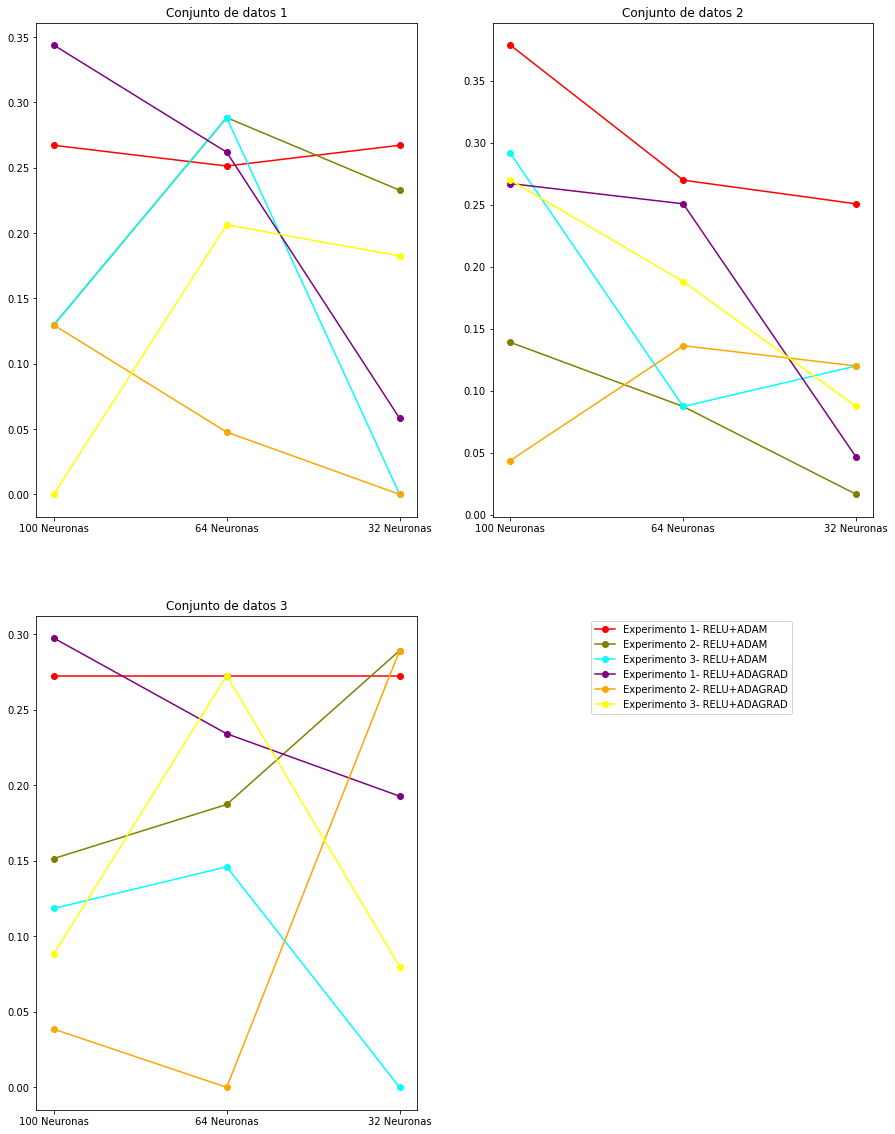

In [6]:
fig = plt.figure(figsize=(15,20))
fig.add_subplot(2,2,1)
plt.plot(df1.loc['Experimento 1- RELU+ADAM'],'o-',label ='Experimento 1- RELU+ADAM',color ='red')
plt.plot(df1.loc['Experimento 2- RELU+ADAM'],'o-',label ='Experimento 2- RELU+ADAM',color ='olive')
plt.plot(df1.loc['Experimento 3- RELU+ADAM'],'o-',label ='Experimento 3- RELU+ADAM',color ='cyan')
plt.plot(df1.loc['Experimento 1- RELU+ADAGRAD'],'o-',label ='Experimento 1- RELU+ADAGRAD',color ='purple')
plt.plot(df1.loc['Experimento 2- RELU+ADAGRAD'],'o-',label ='Experimento 2- RELU+ADAGRAD',color ='orange')
plt.plot(df1.loc['Experimento 3- RELU+ADAGRAD'],'o-',label ='Experimento 3- RELU+ADAGRAD',color ='yellow')
plt.title('Conjunto de datos 1')
fig.add_subplot(2,2,2)
plt.plot(df2.loc['Experimento 1- RELU+ADAM'],'o-',label ='Experimento 1- RELU+ADAM' ,color ='red')
plt.plot(df2.loc['Experimento 2- RELU+ADAM'],'o-',label ='Experimento 2- RELU+ADAM',color ='olive')
plt.plot(df2.loc['Experimento 3- RELU+ADAM'],'o-',label ='Experimento 3- RELU+ADAM',color ='cyan')
plt.plot(df2.loc['Experimento 1- RELU+ADAGRAD'],'o-',label ='Experimento 1- RELU+ADAGRAD',color ='purple')
plt.plot(df2.loc['Experimento 2- RELU+ADAGRAD'],'o-',label ='Experimento 2- RELU+ADAGRAD',color ='orange')
plt.plot(df2.loc['Experimento 3- RELU+ADAGRAD'],'o-',label ='Experimento 3- RELU+ADAGRAD',color ='yellow')
plt.title('Conjunto de datos 2')
fig.add_subplot(2,2,3)
plt.plot(df3.loc['Experimento 1- RELU+ADAM'],'o-',label ='Experimento 1- RELU+ADAM',color ='red')
plt.plot(df3.loc['Experimento 2- RELU+ADAM'],'o-',label ='Experimento 2- RELU+ADAM',color ='olive')
plt.plot(df3.loc['Experimento 3- RELU+ADAM'],'o-',label ='Experimento 3- RELU+ADAM',color ='cyan')
plt.plot(df3.loc['Experimento 1- RELU+ADAGRAD'],'o-',label ='Experimento 1- RELU+ADAGRAD',color ='purple')
plt.plot(df3.loc['Experimento 2- RELU+ADAGRAD'],'o-',label ='Experimento 2- RELU+ADAGRAD',color ='orange')
plt.plot(df3.loc['Experimento 3- RELU+ADAGRAD'],'o-',label ='Experimento 3- RELU+ADAGRAD',color ='yellow')
plt.title('Conjunto de datos 3')
plt.legend(bbox_to_anchor = (2, 1))

# Intervalos 2:

Cargamos los datos:

In [121]:
run 5dias-porintervalos2.ipynb

# Conjunto de datos 1

Construimos el modelo:

In [122]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.metrics import confusion_matrix,balanced_accuracy_score,classification_report

In [123]:
def subida(list):
    resultado = []
    for i in range(1,len(list)):
        if  (list)[i] > (list)[i-1]:
            resultado.append(1)
        else:
            resultado.append(0)
    return resultado

def acierto(list1,list2):
    sum = 0
    for i in range(0,len(list1)):
        if(list1[i]==list2[i]):
            sum = sum +1
    a = sum/len(list1)
    return a


### Dense RELU+ADAM

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

In [124]:
def build_model1(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(Dense(neurons, input_dim = 12, activation=activation_fun))
    model.add(Dense(round(neurons/2), activation=activation_fun))
    model.add(Dense(round(neurons/3), activation=activation_fun))
    model.add(Dense(round(neurons/4), activation=activation_fun))
    model.add(Dense(7, activation='softmax'))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['accuracy'])
    return model

Modelo 100 neuronas:

In [125]:
modeldense100 = build_model1(100,1,'relu','sparse_categorical_crossentropy','adam')
modeldense100.summary()
modeldense100.fit(trainX1, trainy1, epochs=100)

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_360 (Dense)           (None, 100)               1300      
                                                                 
 dense_361 (Dense)           (None, 50)                5050      
                                                                 
 dense_362 (Dense)           (None, 33)                1683      
                                                                 
 dense_363 (Dense)           (None, 25)                850       
                                                                 
 dense_364 (Dense)           (None, 7)                 182       
                                                                 
Total params: 9,065
Trainable params: 9,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================] 

In [126]:
y_preddense100 = modeldense100.predict(testX1)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.5132275132275133
Tasa de aciertos balanceada regresión logística: 0.48
Matriz de confusión:
[[18 11  1  2  0]
 [ 4 88 22 12  1]
 [ 0 31 14 35  1]
 [ 0  6 11 61 27]
 [ 0  4  3 13 13]]
              precision    recall  f1-score   support

         1.0       0.82      0.56      0.67        32
         2.0       0.63      0.69      0.66       127
         3.0       0.27      0.17      0.21        81
         4.0       0.50      0.58      0.54       105
         5.0       0.31      0.39      0.35        33

    accuracy                           0.51       378
   macro avg       0.51      0.48      0.48       378
weighted avg       0.50      0.51      0.50       378



Modelo 64 neuronas

In [127]:
modeldense64 = build_model1(64,1,'relu','sparse_categorical_crossentropy','adam')
modeldense64.summary()
modeldense64.fit(trainX1, trainy1, epochs=100)

Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_365 (Dense)           (None, 64)                832       
                                                                 
 dense_366 (Dense)           (None, 32)                2080      
                                                                 
 dense_367 (Dense)           (None, 21)                693       
                                                                 
 dense_368 (Dense)           (None, 16)                352       
                                                                 
 dense_369 (Dense)           (None, 7)                 119       
                                                                 
Total params: 4,076
Trainable params: 4,076
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================] 

In [128]:
y_preddense64 = modeldense64.predict(testX1)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.30423280423280424
Tasa de aciertos balanceada regresión logística: 0.23
Matriz de confusión:
[[ 3 25  1  3  0]
 [26 18  4 79  0]
 [20  3  1 57  0]
 [12  0  0 93  0]
 [ 6  0  0 27  0]]
              precision    recall  f1-score   support

         1.0       0.04      0.09      0.06        32
         2.0       0.39      0.14      0.21       127
         3.0       0.17      0.01      0.02        81
         4.0       0.36      0.89      0.51       105
         5.0       0.00      0.00      0.00        33

    accuracy                           0.30       378
   macro avg       0.19      0.23      0.16       378
weighted avg       0.27      0.30      0.22       378



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 32 neuronas:

In [129]:
modeldense32 = build_model1(32,1,'relu','sparse_categorical_crossentropy','adam')
modeldense32.summary()
modeldense32.fit(trainX1, trainy1, epochs=100)

Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_370 (Dense)           (None, 32)                416       
                                                                 
 dense_371 (Dense)           (None, 16)                528       
                                                                 
 dense_372 (Dense)           (None, 11)                187       
                                                                 
 dense_373 (Dense)           (None, 8)                 96        
                                                                 
 dense_374 (Dense)           (None, 7)                 63        
                                                                 
Total params: 1,290
Trainable params: 1,290
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================] 

In [130]:
y_preddense32 = modeldense32.predict(testX1)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.23544973544973544
Tasa de aciertos balanceada regresión logística: 0.20
Matriz de confusión:
[[18 11  1  2  0]
 [ 4 88 22 12  1]
 [ 0 31 14 35  1]
 [ 0  6 11 61 27]
 [ 0  4  3 13 13]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00       127
         3.0       0.00      0.00      0.00        81
         4.0       0.29      0.77      0.42       105
         5.0       0.09      0.24      0.13        33

    accuracy                           0.24       378
   macro avg       0.07      0.20      0.11       378
weighted avg       0.09      0.24      0.13       378



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

In [131]:
def build_model2(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(Dense(neurons, input_dim = 12, activation=activation_fun))
    model.add(Dense(round(neurons), activation=activation_fun))
    model.add(Dense(round(neurons/2), activation=activation_fun))
    model.add(Dense(round(neurons/2), activation=activation_fun))
    model.add(Dense(7, activation=activation_fun))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['accuracy'])
    return model

In [132]:
modeldense100 = build_model2(100,1,'relu','sparse_categorical_crossentropy','adam')
modeldense100.summary()
modeldense100.fit(trainX1, trainy1, epochs=100)

Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_375 (Dense)           (None, 100)               1300      
                                                                 
 dense_376 (Dense)           (None, 100)               10100     
                                                                 
 dense_377 (Dense)           (None, 50)                5050      
                                                                 
 dense_378 (Dense)           (None, 50)                2550      
                                                                 
 dense_379 (Dense)           (None, 7)                 357       
                                                                 
Total params: 19,357
Trainable params: 19,357
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================

In [133]:
y_preddense100 = modeldense100.predict(testX1)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.08465608465608465
Tasa de aciertos balanceada regresión logística: 0.20
Matriz de confusión:
[[ 32   0   0   0   0]
 [127   0   0   0   0]
 [ 81   0   0   0   0]
 [105   0   0   0   0]
 [ 33   0   0   0   0]]
              precision    recall  f1-score   support

         1.0       0.08      1.00      0.16        32
         2.0       0.00      0.00      0.00       127
         3.0       0.00      0.00      0.00        81
         4.0       0.00      0.00      0.00       105
         5.0       0.00      0.00      0.00        33

    accuracy                           0.08       378
   macro avg       0.02      0.20      0.03       378
weighted avg       0.01      0.08      0.01       378



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 64 neuronas

In [134]:
modeldense64 = build_model2(64,1,'relu','sparse_categorical_crossentropy','adam')
modeldense64.summary()
modeldense64.fit(trainX1, trainy1, epochs=100)

Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_380 (Dense)           (None, 64)                832       
                                                                 
 dense_381 (Dense)           (None, 64)                4160      
                                                                 
 dense_382 (Dense)           (None, 32)                2080      
                                                                 
 dense_383 (Dense)           (None, 32)                1056      
                                                                 
 dense_384 (Dense)           (None, 7)                 231       
                                                                 
Total params: 8,359
Trainable params: 8,359
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================] 

In [135]:
y_preddense64 = modeldense64.predict(testX1)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.26455026455026454
Tasa de aciertos balanceada regresión logística: 0.22
Matriz de confusión:
[[ 0 26  0  0  6]
 [ 0 87  0  0 40]
 [ 0 47  0  0 34]
 [ 0 68  0  0 37]
 [ 0 20  0  0 13]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.35      0.69      0.46       127
         3.0       0.00      0.00      0.00        81
         4.0       0.00      0.00      0.00       105
         5.0       0.10      0.39      0.16        33

    accuracy                           0.26       378
   macro avg       0.09      0.22      0.12       378
weighted avg       0.13      0.26      0.17       378



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 32 neuronas:

In [136]:
modeldense32 = build_model2(32,1,'relu','sparse_categorical_crossentropy','adam')
modeldense32.summary()
modeldense32.fit(trainX1, trainy1, epochs=100)

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_385 (Dense)           (None, 32)                416       
                                                                 
 dense_386 (Dense)           (None, 32)                1056      
                                                                 
 dense_387 (Dense)           (None, 16)                528       
                                                                 
 dense_388 (Dense)           (None, 16)                272       
                                                                 
 dense_389 (Dense)           (None, 7)                 119       
                                                                 
Total params: 2,391
Trainable params: 2,391
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================] 

In [137]:
y_preddense32 = modeldense32.predict(testX1)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.2751322751322751
Tasa de aciertos balanceada regresión logística: 0.19
Matriz de confusión:
[[ 32   0   0   0   0]
 [127   0   0   0   0]
 [ 81   0   0   0   0]
 [105   0   0   0   0]
 [ 33   0   0   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.32      0.78      0.46       127
         3.0       0.00      0.00      0.00        81
         4.0       0.00      0.00      0.00       105
         5.0       0.07      0.15      0.10        33

    accuracy                           0.28       378
   macro avg       0.08      0.19      0.11       378
weighted avg       0.11      0.28      0.16       378



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### EXPERIMENTO 3: Modelo 10 capas

In [138]:
def build_model3(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(Dense(neurons, input_dim = 12, activation=activation_fun))
    model.add(Dense(round(neurons/2), activation=activation_fun))
    model.add(Dense(round(neurons/3), activation=activation_fun))
    model.add(Dense(round(neurons/4), activation=activation_fun))
    model.add(Dense(round(neurons/5), activation=activation_fun))
    model.add(Dense(round(neurons/6), activation=activation_fun))
    model.add(Dense(round(neurons/7), activation=activation_fun))
    model.add(Dense(round(neurons/8), activation=activation_fun))
    model.add(Dense(round(neurons/9), activation=activation_fun))
    model.add(Dense(7, activation=activation_fun))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['accuracy'])
    return model


Modelo 100 neuronas:

In [139]:
modeldense100 = build_model3(100,1,'relu','sparse_categorical_crossentropy','adam')
modeldense100.summary()
modeldense100.fit(trainX1, trainy1, epochs=100)

Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_390 (Dense)           (None, 100)               1300      
                                                                 
 dense_391 (Dense)           (None, 50)                5050      
                                                                 
 dense_392 (Dense)           (None, 33)                1683      
                                                                 
 dense_393 (Dense)           (None, 25)                850       
                                                                 
 dense_394 (Dense)           (None, 20)                520       
                                                                 
 dense_395 (Dense)           (None, 17)                357       
                                                                 
 dense_396 (Dense)           (None, 14)              

In [140]:
y_preddense100 = modeldense100.predict(testX1)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.2777777777777778
Tasa de aciertos balanceada regresión logística: 0.20
Matriz de confusión:
[[  0   0   0  32   0]
 [  0   0   0 127   0]
 [  0   0   0  81   0]
 [  0   0   0 105   0]
 [  0   0   0  33   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00       127
         3.0       0.00      0.00      0.00        81
         4.0       0.28      1.00      0.43       105
         5.0       0.00      0.00      0.00        33

    accuracy                           0.28       378
   macro avg       0.06      0.20      0.09       378
weighted avg       0.08      0.28      0.12       378



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 64 neuronas:

In [141]:
modeldense64 = build_model3(64,1,'relu','sparse_categorical_crossentropy','adam')
modeldense64.summary()
modeldense64.fit(trainX1, trainy1, epochs=100)

Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_400 (Dense)           (None, 64)                832       
                                                                 
 dense_401 (Dense)           (None, 32)                2080      
                                                                 
 dense_402 (Dense)           (None, 21)                693       
                                                                 
 dense_403 (Dense)           (None, 16)                352       
                                                                 
 dense_404 (Dense)           (None, 13)                221       
                                                                 
 dense_405 (Dense)           (None, 11)                154       
                                                                 
 dense_406 (Dense)           (None, 9)               

In [142]:
y_preddense64 = modeldense64.predict(testX1)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.0
Tasa de aciertos balanceada regresión logística: 0.00
Matriz de confusión:
[[  0   0   0   0   0   0]
 [ 32   0   0   0   0   0]
 [127   0   0   0   0   0]
 [ 81   0   0   0   0   0]
 [105   0   0   0   0   0]
 [ 33   0   0   0   0   0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       0.0
         1.0       0.00      0.00      0.00      32.0
         2.0       0.00      0.00      0.00     127.0
         3.0       0.00      0.00      0.00      81.0
         4.0       0.00      0.00      0.00     105.0
         5.0       0.00      0.00      0.00      33.0

    accuracy                           0.00     378.0
   macro avg       0.00      0.00      0.00     378.0
weighted avg       0.00      0.00      0.00     378.0



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 32 neuronas:

In [143]:
modeldense32 = build_model3(32,1,'relu','sparse_categorical_crossentropy','adam')
modeldense32.summary()
modeldense32.fit(trainX1, trainy1, epochs=100)

Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_410 (Dense)           (None, 32)                416       
                                                                 
 dense_411 (Dense)           (None, 16)                528       
                                                                 
 dense_412 (Dense)           (None, 11)                187       
                                                                 
 dense_413 (Dense)           (None, 8)                 96        
                                                                 
 dense_414 (Dense)           (None, 6)                 54        
                                                                 
 dense_415 (Dense)           (None, 5)                 35        
                                                                 
 dense_416 (Dense)           (None, 5)               

In [144]:
y_preddense32 = modeldense32.predict(testX1)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.0
Tasa de aciertos balanceada regresión logística: 0.00
Matriz de confusión:
[[  0   0   0  32   0]
 [  0   0   0 127   0]
 [  0   0   0  81   0]
 [  0   0   0 105   0]
 [  0   0   0  33   0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       0.0
         1.0       0.00      0.00      0.00      32.0
         2.0       0.00      0.00      0.00     127.0
         3.0       0.00      0.00      0.00      81.0
         4.0       0.00      0.00      0.00     105.0
         5.0       0.00      0.00      0.00      33.0

    accuracy                           0.00     378.0
   macro avg       0.00      0.00      0.00     378.0
weighted avg       0.00      0.00      0.00     378.0



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

### Dense RELU+ADAGRAD

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

Modelo 100 neuronas:

In [145]:
modeldense100 = build_model1(100,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense100.summary()
modeldense100.fit(trainX1, trainy1, epochs=100)

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_420 (Dense)           (None, 100)               1300      
                                                                 
 dense_421 (Dense)           (None, 50)                5050      
                                                                 
 dense_422 (Dense)           (None, 33)                1683      
                                                                 
 dense_423 (Dense)           (None, 25)                850       
                                                                 
 dense_424 (Dense)           (None, 7)                 182       
                                                                 
Total params: 9,065
Trainable params: 9,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================] 

In [146]:
y_preddense100 = modeldense100.predict(testX1)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.35185185185185186
Tasa de aciertos balanceada regresión logística: 0.32
Matriz de confusión:
[[15 10  0  6  1]
 [17 49  5 56  0]
 [ 5 20  1 55  0]
 [ 0 27  6 65  7]
 [ 1 12  2 15  3]]
              precision    recall  f1-score   support

         1.0       0.39      0.47      0.43        32
         2.0       0.42      0.39      0.40       127
         3.0       0.07      0.01      0.02        81
         4.0       0.33      0.62      0.43       105
         5.0       0.27      0.09      0.14        33

    accuracy                           0.35       378
   macro avg       0.30      0.32      0.28       378
weighted avg       0.30      0.35      0.31       378



Modelo 64 neuronas

In [147]:
modeldense64 = build_model1(64,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense64.summary()
modeldense64.fit(trainX1, trainy1, epochs=100)

Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_425 (Dense)           (None, 64)                832       
                                                                 
 dense_426 (Dense)           (None, 32)                2080      
                                                                 
 dense_427 (Dense)           (None, 21)                693       
                                                                 
 dense_428 (Dense)           (None, 16)                352       
                                                                 
 dense_429 (Dense)           (None, 7)                 119       
                                                                 
Total params: 4,076
Trainable params: 4,076
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================] 

In [148]:
y_preddense64 = modeldense64.predict(testX1)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.3386243386243386
Tasa de aciertos balanceada regresión logística: 0.32
Matriz de confusión:
[[ 0  0  0  0  0  0]
 [ 0 17  8  1  4  2]
 [ 0 20 48  3 51  5]
 [ 0  4 36  4 35  2]
 [ 1  0 35  9 55  5]
 [ 0  0  8  5 16  4]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.41      0.53      0.47        32
         2.0       0.36      0.38      0.37       127
         3.0       0.18      0.05      0.08        81
         4.0       0.34      0.52      0.41       105
         5.0       0.22      0.12      0.16        33

    accuracy                           0.34       378
   macro avg       0.25      0.27      0.25       378
weighted avg       0.31      0.34      0.31       378



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Us

Modelo 32 neuronas:

In [149]:
modeldense32 = build_model1(32,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense32.summary()
modeldense32.fit(trainX1, trainy1, epochs=100)

Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_430 (Dense)           (None, 32)                416       
                                                                 
 dense_431 (Dense)           (None, 16)                528       
                                                                 
 dense_432 (Dense)           (None, 11)                187       
                                                                 
 dense_433 (Dense)           (None, 8)                 96        
                                                                 
 dense_434 (Dense)           (None, 7)                 63        
                                                                 
Total params: 1,290
Trainable params: 1,290
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================] 

In [150]:
y_preddense32 = modeldense32.predict(testX1)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.20899470899470898
Tasa de aciertos balanceada regresión logística: 0.19
Matriz de confusión:
[[15 10  0  6  1]
 [17 49  5 56  0]
 [ 5 20  1 55  0]
 [ 0 27  6 65  7]
 [ 1 12  2 15  3]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.44      0.06      0.11       127
         3.0       0.21      0.88      0.33        81
         4.0       0.00      0.00      0.00       105
         5.0       0.00      0.00      0.00        33
         6.0       0.00      0.00      0.00         0

    accuracy                           0.21       378
   macro avg       0.11      0.16      0.07       378
weighted avg       0.19      0.21      0.11       378



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

In [151]:
modeldense100 = build_model2(100,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense100.summary()
modeldense100.fit(trainX1, trainy1, epochs=100)

Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_435 (Dense)           (None, 100)               1300      
                                                                 
 dense_436 (Dense)           (None, 100)               10100     
                                                                 
 dense_437 (Dense)           (None, 50)                5050      
                                                                 
 dense_438 (Dense)           (None, 50)                2550      
                                                                 
 dense_439 (Dense)           (None, 7)                 357       
                                                                 
Total params: 19,357
Trainable params: 19,357
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================

In [152]:
y_preddense100 = modeldense100.predict(testX1)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.0873015873015873
Tasa de aciertos balanceada regresión logística: 0.20
Matriz de confusión:
[[  0   0   0   0  32]
 [  0   0   0   0 127]
 [  0   0   0   0  81]
 [  0   0   0   0 105]
 [  0   0   0   0  33]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00       127
         3.0       0.00      0.00      0.00        81
         4.0       0.00      0.00      0.00       105
         5.0       0.09      1.00      0.16        33

    accuracy                           0.09       378
   macro avg       0.02      0.20      0.03       378
weighted avg       0.01      0.09      0.01       378



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 64 neuronas

In [153]:
modeldense64 = build_model2(64,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense64.summary()
modeldense64.fit(trainX1, trainy1, epochs=100)

Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_440 (Dense)           (None, 64)                832       
                                                                 
 dense_441 (Dense)           (None, 64)                4160      
                                                                 
 dense_442 (Dense)           (None, 32)                2080      
                                                                 
 dense_443 (Dense)           (None, 32)                1056      
                                                                 
 dense_444 (Dense)           (None, 7)                 231       
                                                                 
Total params: 8,359
Trainable params: 8,359
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================] 

In [154]:
y_preddense64 = modeldense64.predict(testX1)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.0873015873015873
Tasa de aciertos balanceada regresión logística: 0.20
Matriz de confusión:
[[  0   0   0   0  32]
 [  0   0   0   0 127]
 [  0   0   0   0  81]
 [  0   0   0   0 105]
 [  0   0   0   0  33]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00       127
         3.0       0.00      0.00      0.00        81
         4.0       0.00      0.00      0.00       105
         5.0       0.09      1.00      0.16        33

    accuracy                           0.09       378
   macro avg       0.02      0.20      0.03       378
weighted avg       0.01      0.09      0.01       378



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 32 neuronas:

In [155]:
modeldense32 = build_model2(32,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense32.summary()
modeldense32.fit(trainX1, trainy1, epochs=100)

Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_445 (Dense)           (None, 32)                416       
                                                                 
 dense_446 (Dense)           (None, 32)                1056      
                                                                 
 dense_447 (Dense)           (None, 16)                528       
                                                                 
 dense_448 (Dense)           (None, 16)                272       
                                                                 
 dense_449 (Dense)           (None, 7)                 119       
                                                                 
Total params: 2,391
Trainable params: 2,391
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================] 

In [156]:
y_preddense32 = modeldense32.predict(testX1)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.08465608465608465
Tasa de aciertos balanceada regresión logística: 0.20
Matriz de confusión:
[[  0   0   0   0  32]
 [  0   0   0   0 127]
 [  0   0   0   0  81]
 [  0   0   0   0 105]
 [  0   0   0   0  33]]
              precision    recall  f1-score   support

         1.0       0.08      1.00      0.16        32
         2.0       0.00      0.00      0.00       127
         3.0       0.00      0.00      0.00        81
         4.0       0.00      0.00      0.00       105
         5.0       0.00      0.00      0.00        33

    accuracy                           0.08       378
   macro avg       0.02      0.20      0.03       378
weighted avg       0.01      0.08      0.01       378



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### EXPERIMENTO 3: Modelo 10 capas

Modelo 100 neuronas:

In [157]:
modeldense100 = build_model3(100,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense100.summary()
modeldense100.fit(trainX1, trainy1, epochs=100)

Model: "sequential_69"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_450 (Dense)           (None, 100)               1300      
                                                                 
 dense_451 (Dense)           (None, 50)                5050      
                                                                 
 dense_452 (Dense)           (None, 33)                1683      
                                                                 
 dense_453 (Dense)           (None, 25)                850       
                                                                 
 dense_454 (Dense)           (None, 20)                520       
                                                                 
 dense_455 (Dense)           (None, 17)                357       
                                                                 
 dense_456 (Dense)           (None, 14)              

In [158]:
y_preddense100 = modeldense100.predict(testX1)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.2777777777777778
Tasa de aciertos balanceada regresión logística: 0.20
Matriz de confusión:
[[  0   0   0  32   0]
 [  0   0   0 127   0]
 [  0   0   0  81   0]
 [  0   0   0 105   0]
 [  0   0   0  33   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00       127
         3.0       0.00      0.00      0.00        81
         4.0       0.28      1.00      0.43       105
         5.0       0.00      0.00      0.00        33

    accuracy                           0.28       378
   macro avg       0.06      0.20      0.09       378
weighted avg       0.08      0.28      0.12       378



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 64 neuronas:

In [159]:
modeldense64 = build_model3(64,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense64.summary()
modeldense64.fit(trainX1, trainy1, epochs=100)

Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_460 (Dense)           (None, 64)                832       
                                                                 
 dense_461 (Dense)           (None, 32)                2080      
                                                                 
 dense_462 (Dense)           (None, 21)                693       
                                                                 
 dense_463 (Dense)           (None, 16)                352       
                                                                 
 dense_464 (Dense)           (None, 13)                221       
                                                                 
 dense_465 (Dense)           (None, 11)                154       
                                                                 
 dense_466 (Dense)           (None, 9)               

Epoch 65/100
48/48 [==============================] - 0s 3ms/step - loss: 13.1550 - accuracy: 0.1839
Epoch 66/100
48/48 [==============================] - 0s 2ms/step - loss: 13.1550 - accuracy: 0.1839
Epoch 67/100
48/48 [==============================] - 0s 2ms/step - loss: 13.1550 - accuracy: 0.1839
Epoch 68/100
48/48 [==============================] - 0s 3ms/step - loss: 13.1550 - accuracy: 0.1839
Epoch 69/100
48/48 [==============================] - 0s 2ms/step - loss: 13.1550 - accuracy: 0.1839
Epoch 70/100
48/48 [==============================] - 0s 2ms/step - loss: 13.1550 - accuracy: 0.1839
Epoch 71/100
48/48 [==============================] - 0s 3ms/step - loss: 13.1550 - accuracy: 0.1839
Epoch 72/100
48/48 [==============================] - 0s 2ms/step - loss: 13.1550 - accuracy: 0.1839
Epoch 73/100
48/48 [==============================] - 0s 2ms/step - loss: 13.1550 - accuracy: 0.1839
Epoch 74/100
48/48 [==============================] - 0s 2ms/step - loss: 13.1550 - accurac

In [160]:
y_preddense64 = modeldense64.predict(testX1)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.21428571428571427
Tasa de aciertos balanceada regresión logística: 0.20
Matriz de confusión:
[[  0   0  32   0   0]
 [  0   0 127   0   0]
 [  0   0  81   0   0]
 [  0   0 105   0   0]
 [  0   0  33   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00       127
         3.0       0.21      1.00      0.35        81
         4.0       0.00      0.00      0.00       105
         5.0       0.00      0.00      0.00        33

    accuracy                           0.21       378
   macro avg       0.04      0.20      0.07       378
weighted avg       0.05      0.21      0.08       378



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 32 neuronas:

In [161]:
modeldense32 = build_model3(32,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense32.summary()
modeldense32.fit(trainX1, trainy1, epochs=100)

Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_470 (Dense)           (None, 32)                416       
                                                                 
 dense_471 (Dense)           (None, 16)                528       
                                                                 
 dense_472 (Dense)           (None, 11)                187       
                                                                 
 dense_473 (Dense)           (None, 8)                 96        
                                                                 
 dense_474 (Dense)           (None, 6)                 54        
                                                                 
 dense_475 (Dense)           (None, 5)                 35        
                                                                 
 dense_476 (Dense)           (None, 5)               

In [162]:
y_preddense32 = modeldense32.predict(testX1)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.0873015873015873
Tasa de aciertos balanceada regresión logística: 0.20
Matriz de confusión:
[[  0   0   0  32   0]
 [  0   0   0 127   0]
 [  0   0   0  81   0]
 [  0   0   0 105   0]
 [  0   0   0  33   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00       127
         3.0       0.00      0.00      0.00        81
         4.0       0.00      0.00      0.00       105
         5.0       0.09      1.00      0.16        33

    accuracy                           0.09       378
   macro avg       0.02      0.20      0.03       378
weighted avg       0.01      0.09      0.01       378



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Conjunto de datos 2

Construimos el modelo:

### Dense RELU+ADAM

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

In [163]:
def build_model1(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(Dense(neurons, input_dim = 22, activation=activation_fun))
    model.add(Dense(round(neurons/2), activation=activation_fun))
    model.add(Dense(round(neurons/3), activation=activation_fun))
    model.add(Dense(round(neurons/4), activation=activation_fun))
    model.add(Dense(7, activation='softmax'))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['accuracy'])
    return model

Modelo 100 neuronas:

In [164]:
modeldense100 = build_model1(100,1,'relu','sparse_categorical_crossentropy','adam')
modeldense100.summary()
modeldense100.fit(trainX2, trainy2, epochs=100)

Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_480 (Dense)           (None, 100)               2300      
                                                                 
 dense_481 (Dense)           (None, 50)                5050      
                                                                 
 dense_482 (Dense)           (None, 33)                1683      
                                                                 
 dense_483 (Dense)           (None, 25)                850       
                                                                 
 dense_484 (Dense)           (None, 7)                 182       
                                                                 
Total params: 10,065
Trainable params: 10,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================

Epoch 72/100
46/46 [==============================] - 0s 3ms/step - loss: 2.3585 - accuracy: 0.3426
Epoch 73/100
46/46 [==============================] - 0s 4ms/step - loss: 2.0099 - accuracy: 0.3508
Epoch 74/100
46/46 [==============================] - 0s 3ms/step - loss: 1.6410 - accuracy: 0.3856
Epoch 75/100
46/46 [==============================] - 0s 3ms/step - loss: 2.9823 - accuracy: 0.3760
Epoch 76/100
46/46 [==============================] - 0s 3ms/step - loss: 6.3143 - accuracy: 0.2698
Epoch 77/100
46/46 [==============================] - 0s 3ms/step - loss: 2.1380 - accuracy: 0.3426
Epoch 78/100
46/46 [==============================] - 0s 3ms/step - loss: 1.8512 - accuracy: 0.3726
Epoch 79/100
46/46 [==============================] - 0s 3ms/step - loss: 1.7894 - accuracy: 0.3658
Epoch 80/100
46/46 [==============================] - 0s 3ms/step - loss: 1.6586 - accuracy: 0.3781
Epoch 81/100
46/46 [==============================] - 0s 2ms/step - loss: 2.4168 - accuracy: 0.3106


In [165]:
y_preddense100 = modeldense100.predict(testX2)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.3569482288828338
Tasa de aciertos balanceada regresión logística: 0.38
Matriz de confusión:
[[ 11   0  21   0   0]
 [  0   0 126   1   0]
 [  0   0  75   4   0]
 [  0   0  54  39   5]
 [  0   0  15  10   6]]
              precision    recall  f1-score   support

         1.0       1.00      0.34      0.51        32
         2.0       0.00      0.00      0.00       127
         3.0       0.26      0.95      0.41        79
         4.0       0.72      0.40      0.51        98
         5.0       0.55      0.19      0.29        31

    accuracy                           0.36       367
   macro avg       0.51      0.38      0.34       367
weighted avg       0.38      0.36      0.29       367



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 64 neuronas

In [166]:
modeldense64 = build_model1(64,1,'relu','sparse_categorical_crossentropy','adam')
modeldense64.summary()
modeldense64.fit(trainX2, trainy2, epochs=100)

Model: "sequential_73"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_485 (Dense)           (None, 64)                1472      
                                                                 
 dense_486 (Dense)           (None, 32)                2080      
                                                                 
 dense_487 (Dense)           (None, 21)                693       
                                                                 
 dense_488 (Dense)           (None, 16)                352       
                                                                 
 dense_489 (Dense)           (None, 7)                 119       
                                                                 
Total params: 4,716
Trainable params: 4,716
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [167]:
y_preddense64 = modeldense64.predict(testX2)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.3896457765667575
Tasa de aciertos balanceada regresión logística: 0.27
Matriz de confusión:
[[ 3 27  2  0  0]
 [ 1 93 15 18  0]
 [ 0 47  3 26  3]
 [ 0 54  0 43  1]
 [ 0 14  0 16  1]]
              precision    recall  f1-score   support

         1.0       0.75      0.09      0.17        32
         2.0       0.40      0.73      0.51       127
         3.0       0.15      0.04      0.06        79
         4.0       0.42      0.44      0.43        98
         5.0       0.20      0.03      0.06        31

    accuracy                           0.39       367
   macro avg       0.38      0.27      0.24       367
weighted avg       0.36      0.39      0.32       367



Modelo 32 neuronas:

In [168]:
modeldense32 = build_model1(32,1,'relu','sparse_categorical_crossentropy','adam')
modeldense32.summary()
modeldense32.fit(trainX2, trainy2, epochs=100)

Model: "sequential_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_490 (Dense)           (None, 32)                736       
                                                                 
 dense_491 (Dense)           (None, 16)                528       
                                                                 
 dense_492 (Dense)           (None, 11)                187       
                                                                 
 dense_493 (Dense)           (None, 8)                 96        
                                                                 
 dense_494 (Dense)           (None, 7)                 63        
                                                                 
Total params: 1,610
Trainable params: 1,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

46/46 [==============================] - 0s 2ms/step - loss: 1.5846 - accuracy: 0.2861
Epoch 73/100
46/46 [==============================] - 0s 2ms/step - loss: 1.5906 - accuracy: 0.2861
Epoch 74/100
46/46 [==============================] - 0s 2ms/step - loss: 1.5866 - accuracy: 0.2861
Epoch 75/100
46/46 [==============================] - 0s 2ms/step - loss: 1.5838 - accuracy: 0.2861
Epoch 76/100
46/46 [==============================] - 0s 2ms/step - loss: 1.5829 - accuracy: 0.2861
Epoch 77/100
46/46 [==============================] - 0s 2ms/step - loss: 1.5808 - accuracy: 0.2861
Epoch 78/100
46/46 [==============================] - 0s 2ms/step - loss: 1.5848 - accuracy: 0.2854
Epoch 79/100
46/46 [==============================] - 0s 2ms/step - loss: 1.5953 - accuracy: 0.2868
Epoch 80/100
46/46 [==============================] - 0s 2ms/step - loss: 1.5827 - accuracy: 0.2861
Epoch 81/100
46/46 [==============================] - 0s 2ms/step - loss: 1.5808 - accuracy: 0.2861
Epoch 82/100


In [169]:
y_preddense32 = modeldense32.predict(testX2)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.2670299727520436
Tasa de aciertos balanceada regresión logística: 0.20
Matriz de confusión:
[[ 11   0  21   0   0]
 [  0   0 126   1   0]
 [  0   0  75   4   0]
 [  0   0  54  39   5]
 [  0   0  15  10   6]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00       127
         3.0       0.00      0.00      0.00        79
         4.0       0.27      1.00      0.42        98
         5.0       0.00      0.00      0.00        31

    accuracy                           0.27       367
   macro avg       0.05      0.20      0.08       367
weighted avg       0.07      0.27      0.11       367



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

In [170]:
def build_model2(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(Dense(neurons, input_dim = 22, activation=activation_fun))
    model.add(Dense(round(neurons), activation=activation_fun))
    model.add(Dense(round(neurons/2), activation=activation_fun))
    model.add(Dense(round(neurons/2), activation=activation_fun))
    model.add(Dense(7, activation=activation_fun))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['accuracy'])
    return model

In [171]:
modeldense100 = build_model2(100,1,'relu','sparse_categorical_crossentropy','adam')
modeldense100.summary()
modeldense100.fit(trainX2, trainy2, epochs=100)

Model: "sequential_75"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_495 (Dense)           (None, 100)               2300      
                                                                 
 dense_496 (Dense)           (None, 100)               10100     
                                                                 
 dense_497 (Dense)           (None, 50)                5050      
                                                                 
 dense_498 (Dense)           (None, 50)                2550      
                                                                 
 dense_499 (Dense)           (None, 7)                 357       
                                                                 
Total params: 20,357
Trainable params: 20,357
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================

In [172]:
y_preddense100 = modeldense100.predict(testX2)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.07629427792915532
Tasa de aciertos balanceada regresión logística: 0.07
Matriz de confusión:
[[ 0  0  0  0  0  0]
 [11  0  0 21  0  0]
 [63  0  0 64  0  0]
 [51  0  0 28  0  0]
 [67  0  0 31  0  0]
 [23  0  0  8  0  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00       127
         3.0       0.18      0.35      0.24        79
         4.0       0.00      0.00      0.00        98
         5.0       0.00      0.00      0.00        31

    accuracy                           0.08       367
   macro avg       0.03      0.06      0.04       367
weighted avg       0.04      0.08      0.05       367



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 64 neuronas

In [173]:
modeldense64 = build_model2(64,1,'relu','sparse_categorical_crossentropy','adam')
modeldense64.summary()
modeldense64.fit(trainX2, trainy2, epochs=100)

Model: "sequential_76"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_500 (Dense)           (None, 64)                1472      
                                                                 
 dense_501 (Dense)           (None, 64)                4160      
                                                                 
 dense_502 (Dense)           (None, 32)                2080      
                                                                 
 dense_503 (Dense)           (None, 32)                1056      
                                                                 
 dense_504 (Dense)           (None, 7)                 231       
                                                                 
Total params: 8,999
Trainable params: 8,999
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [174]:
y_preddense64 = modeldense64.predict(testX2)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.3460490463215259
Tasa de aciertos balanceada regresión logística: 0.20
Matriz de confusión:
[[  0  32   0   0   0]
 [  0 127   0   0   0]
 [  0  79   0   0   0]
 [  0  98   0   0   0]
 [  0  31   0   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.35      1.00      0.51       127
         3.0       0.00      0.00      0.00        79
         4.0       0.00      0.00      0.00        98
         5.0       0.00      0.00      0.00        31

    accuracy                           0.35       367
   macro avg       0.07      0.20      0.10       367
weighted avg       0.12      0.35      0.18       367



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 32 neuronas:

In [175]:
modeldense32 = build_model2(32,1,'relu','sparse_categorical_crossentropy','adam')
modeldense32.summary()
modeldense32.fit(trainX2, trainy2, epochs=100)

Model: "sequential_77"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_505 (Dense)           (None, 32)                736       
                                                                 
 dense_506 (Dense)           (None, 32)                1056      
                                                                 
 dense_507 (Dense)           (None, 16)                528       
                                                                 
 dense_508 (Dense)           (None, 16)                272       
                                                                 
 dense_509 (Dense)           (None, 7)                 119       
                                                                 
Total params: 2,711
Trainable params: 2,711
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [176]:
y_preddense32 = modeldense32.predict(testX2)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.21525885558583105
Tasa de aciertos balanceada regresión logística: 0.20
Matriz de confusión:
[[ 0  0  0  0  0  0]
 [11  0  0 21  0  0]
 [63  0  0 64  0  0]
 [51  0  0 28  0  0]
 [67  0  0 31  0  0]
 [23  0  0  8  0  0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00       127
         3.0       0.22      1.00      0.35        79
         4.0       0.00      0.00      0.00        98
         5.0       0.00      0.00      0.00        31

    accuracy                           0.22       367
   macro avg       0.04      0.20      0.07       367
weighted avg       0.05      0.22      0.08       367



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### EXPERIMENTO 3: Modelo 10 capas

In [177]:
def build_model3(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(Dense(neurons, input_dim = 22, activation=activation_fun))
    model.add(Dense(round(neurons/2), activation=activation_fun))
    model.add(Dense(round(neurons/3), activation=activation_fun))
    model.add(Dense(round(neurons/4), activation=activation_fun))
    model.add(Dense(round(neurons/5), activation=activation_fun))
    model.add(Dense(round(neurons/6), activation=activation_fun))
    model.add(Dense(round(neurons/7), activation=activation_fun))
    model.add(Dense(round(neurons/8), activation=activation_fun))
    model.add(Dense(round(neurons/9), activation=activation_fun))
    model.add(Dense(7, activation=activation_fun))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['accuracy'])
    return model


Modelo 100 neuronas:

In [178]:
modeldense100 = build_model3(100,1,'relu','sparse_categorical_crossentropy','adam')
modeldense100.summary()
modeldense100.fit(trainX2, trainy2, epochs=100)

Model: "sequential_78"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_510 (Dense)           (None, 100)               2300      
                                                                 
 dense_511 (Dense)           (None, 50)                5050      
                                                                 
 dense_512 (Dense)           (None, 33)                1683      
                                                                 
 dense_513 (Dense)           (None, 25)                850       
                                                                 
 dense_514 (Dense)           (None, 20)                520       
                                                                 
 dense_515 (Dense)           (None, 17)                357       
                                                                 
 dense_516 (Dense)           (None, 14)              

In [179]:
y_preddense100 = modeldense100.predict(testX2)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.08446866485013624
Tasa de aciertos balanceada regresión logística: 0.20
Matriz de confusión:
[[  0   0   0   0  32]
 [  0   0   0   0 127]
 [  0   0   0   0  79]
 [  0   0   0   0  98]
 [  0   0   0   0  31]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00       127
         3.0       0.00      0.00      0.00        79
         4.0       0.00      0.00      0.00        98
         5.0       0.08      1.00      0.16        31

    accuracy                           0.08       367
   macro avg       0.02      0.20      0.03       367
weighted avg       0.01      0.08      0.01       367



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 64 neuronas:

In [180]:
modeldense64 = build_model3(64,1,'relu','sparse_categorical_crossentropy','adam')
modeldense64.summary()
modeldense64.fit(trainX2, trainy2, epochs=100)

Model: "sequential_79"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_520 (Dense)           (None, 64)                1472      
                                                                 
 dense_521 (Dense)           (None, 32)                2080      
                                                                 
 dense_522 (Dense)           (None, 21)                693       
                                                                 
 dense_523 (Dense)           (None, 16)                352       
                                                                 
 dense_524 (Dense)           (None, 13)                221       
                                                                 
 dense_525 (Dense)           (None, 11)                154       
                                                                 
 dense_526 (Dense)           (None, 9)               

46/46 [==============================] - 0s 3ms/step - loss: 9.3830 - accuracy: 0.0000e+00
Epoch 64/100
46/46 [==============================] - 0s 3ms/step - loss: 9.3830 - accuracy: 0.0000e+00
Epoch 65/100
46/46 [==============================] - 0s 3ms/step - loss: 9.3830 - accuracy: 0.0000e+00
Epoch 66/100
46/46 [==============================] - 0s 3ms/step - loss: 9.3830 - accuracy: 0.0000e+00
Epoch 67/100
46/46 [==============================] - 0s 3ms/step - loss: 9.3830 - accuracy: 0.0000e+00
Epoch 68/100
46/46 [==============================] - 0s 2ms/step - loss: 9.3830 - accuracy: 0.0000e+00
Epoch 69/100
46/46 [==============================] - 0s 2ms/step - loss: 9.3830 - accuracy: 0.0000e+00
Epoch 70/100
46/46 [==============================] - 0s 2ms/step - loss: 9.3830 - accuracy: 0.0000e+00
Epoch 71/100
46/46 [==============================] - 0s 3ms/step - loss: 9.3830 - accuracy: 0.0000e+00
Epoch 72/100
46/46 [==============================] - 0s 2ms/step - loss: 9.3

In [181]:
y_preddense64 = modeldense64.predict(testX2)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.0
Tasa de aciertos balanceada regresión logística: 0.00
Matriz de confusión:
[[  0   0   0   0   0   0]
 [ 32   0   0   0   0   0]
 [127   0   0   0   0   0]
 [ 79   0   0   0   0   0]
 [ 98   0   0   0   0   0]
 [ 31   0   0   0   0   0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       0.0
         1.0       0.00      0.00      0.00      32.0
         2.0       0.00      0.00      0.00     127.0
         3.0       0.00      0.00      0.00      79.0
         4.0       0.00      0.00      0.00      98.0
         5.0       0.00      0.00      0.00      31.0

    accuracy                           0.00     367.0
   macro avg       0.00      0.00      0.00     367.0
weighted avg       0.00      0.00      0.00     367.0



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 32 neuronas:

In [182]:
modeldense32 = build_model3(32,1,'relu','sparse_categorical_crossentropy','adam')
modeldense32.summary()
modeldense32.fit(trainX2, trainy2, epochs=100)

Model: "sequential_80"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_530 (Dense)           (None, 32)                736       
                                                                 
 dense_531 (Dense)           (None, 16)                528       
                                                                 
 dense_532 (Dense)           (None, 11)                187       
                                                                 
 dense_533 (Dense)           (None, 8)                 96        
                                                                 
 dense_534 (Dense)           (None, 6)                 54        
                                                                 
 dense_535 (Dense)           (None, 5)                 35        
                                                                 
 dense_536 (Dense)           (None, 5)               

In [183]:
y_preddense32 = modeldense32.predict(testX2)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.0
Tasa de aciertos balanceada regresión logística: 0.00
Matriz de confusión:
[[  0   0   0   0  32]
 [  0   0   0   0 127]
 [  0   0   0   0  79]
 [  0   0   0   0  98]
 [  0   0   0   0  31]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       0.0
         1.0       0.00      0.00      0.00      32.0
         2.0       0.00      0.00      0.00     127.0
         3.0       0.00      0.00      0.00      79.0
         4.0       0.00      0.00      0.00      98.0
         5.0       0.00      0.00      0.00      31.0

    accuracy                           0.00     367.0
   macro avg       0.00      0.00      0.00     367.0
weighted avg       0.00      0.00      0.00     367.0



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

### Dense RELU+ADAGRAD

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

Modelo 100 neuronas:

In [184]:
modeldense100 = build_model1(100,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense100.summary()
modeldense100.fit(trainX2, trainy2, epochs=100)

Model: "sequential_81"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_540 (Dense)           (None, 100)               2300      
                                                                 
 dense_541 (Dense)           (None, 50)                5050      
                                                                 
 dense_542 (Dense)           (None, 33)                1683      
                                                                 
 dense_543 (Dense)           (None, 25)                850       
                                                                 
 dense_544 (Dense)           (None, 7)                 182       
                                                                 
Total params: 10,065
Trainable params: 10,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================

In [185]:
y_preddense100 = modeldense100.predict(testX2)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.335149863760218
Tasa de aciertos balanceada regresión logística: 0.33
Matriz de confusión:
[[15 13  4  0  0]
 [19 65 16 24  3]
 [ 4 25 11 36  3]
 [ 2 30 17 22 27]
 [ 1  3  5 12 10]]
              precision    recall  f1-score   support

         1.0       0.37      0.47      0.41        32
         2.0       0.48      0.51      0.49       127
         3.0       0.21      0.14      0.17        79
         4.0       0.23      0.22      0.23        98
         5.0       0.23      0.32      0.27        31

    accuracy                           0.34       367
   macro avg       0.30      0.33      0.31       367
weighted avg       0.32      0.34      0.33       367



Modelo 64 neuronas

In [186]:
modeldense64 = build_model1(64,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense64.summary()
modeldense64.fit(trainX2, trainy2, epochs=100)

Model: "sequential_82"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_545 (Dense)           (None, 64)                1472      
                                                                 
 dense_546 (Dense)           (None, 32)                2080      
                                                                 
 dense_547 (Dense)           (None, 21)                693       
                                                                 
 dense_548 (Dense)           (None, 16)                352       
                                                                 
 dense_549 (Dense)           (None, 7)                 119       
                                                                 
Total params: 4,716
Trainable params: 4,716
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [187]:
y_preddense64 = modeldense64.predict(testX2)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.3024523160762943
Tasa de aciertos balanceada regresión logística: 0.30
Matriz de confusión:
[[16 13  2  1  0  0]
 [42 34 16 31  3  1]
 [22 14 10 31  1  1]
 [16 18  7 48  9  0]
 [ 3  2  5 18  3  0]
 [ 0  0  0  0  0  0]]
              precision    recall  f1-score   support

         1.0       0.16      0.50      0.24        32
         2.0       0.42      0.27      0.33       127
         3.0       0.25      0.13      0.17        79
         4.0       0.37      0.49      0.42        98
         5.0       0.19      0.10      0.13        31
         6.0       0.00      0.00      0.00         0

    accuracy                           0.30       367
   macro avg       0.23      0.25      0.21       367
weighted avg       0.33      0.30      0.29       367



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Us

Modelo 32 neuronas:

In [188]:
modeldense32 = build_model1(32,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense32.summary()
modeldense32.fit(trainX2, trainy2, epochs=100)

Model: "sequential_83"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_550 (Dense)           (None, 32)                736       
                                                                 
 dense_551 (Dense)           (None, 16)                528       
                                                                 
 dense_552 (Dense)           (None, 11)                187       
                                                                 
 dense_553 (Dense)           (None, 8)                 96        
                                                                 
 dense_554 (Dense)           (None, 7)                 63        
                                                                 
Total params: 1,610
Trainable params: 1,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [189]:
y_preddense32 = modeldense32.predict(testX2)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.08446866485013624
Tasa de aciertos balanceada regresión logística: 0.20
Matriz de confusión:
[[15 13  4  0  0]
 [19 65 16 24  3]
 [ 4 25 11 36  3]
 [ 2 30 17 22 27]
 [ 1  3  5 12 10]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00       127
         3.0       0.00      0.00      0.00        79
         4.0       0.00      0.00      0.00        98
         5.0       0.08      1.00      0.16        31

    accuracy                           0.08       367
   macro avg       0.02      0.20      0.03       367
weighted avg       0.01      0.08      0.01       367



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

In [190]:
modeldense100 = build_model2(100,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense100.summary()
modeldense100.fit(trainX2, trainy2, epochs=100)

Model: "sequential_84"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_555 (Dense)           (None, 100)               2300      
                                                                 
 dense_556 (Dense)           (None, 100)               10100     
                                                                 
 dense_557 (Dense)           (None, 50)                5050      
                                                                 
 dense_558 (Dense)           (None, 50)                2550      
                                                                 
 dense_559 (Dense)           (None, 7)                 357       
                                                                 
Total params: 20,357
Trainable params: 20,357
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================

In [191]:
y_preddense100 = modeldense100.predict(testX2)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.09536784741144415
Tasa de aciertos balanceada regresión logística: 0.09
Matriz de confusión:
[[ 0  0  0  0  0  0]
 [23  0  0  9  0  0]
 [81  0  0 46  0  0]
 [44  0  0 35  0  0]
 [57  0  0 41  0  0]
 [14  0  0 17  0  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00       127
         3.0       0.24      0.44      0.31        79
         4.0       0.00      0.00      0.00        98
         5.0       0.00      0.00      0.00        31

    accuracy                           0.10       367
   macro avg       0.04      0.07      0.05       367
weighted avg       0.05      0.10      0.07       367



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 64 neuronas

In [192]:
modeldense64 = build_model2(64,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense64.summary()
modeldense64.fit(trainX2, trainy2, epochs=100)

Model: "sequential_85"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_560 (Dense)           (None, 64)                1472      
                                                                 
 dense_561 (Dense)           (None, 64)                4160      
                                                                 
 dense_562 (Dense)           (None, 32)                2080      
                                                                 
 dense_563 (Dense)           (None, 32)                1056      
                                                                 
 dense_564 (Dense)           (None, 7)                 231       
                                                                 
Total params: 8,999
Trainable params: 8,999
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [193]:
y_preddense64 = modeldense64.predict(testX2)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.0
Tasa de aciertos balanceada regresión logística: 0.00
Matriz de confusión:
[[  0   0   0   0   0  32]
 [  1   0   0   0   0 126]
 [  3   0   0   0   0  76]
 [  2   0   0   0   0  96]
 [  0   0   0   0   0  31]
 [  0   0   0   0   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00      32.0
         2.0       0.00      0.00      0.00     127.0
         3.0       0.00      0.00      0.00      79.0
         4.0       0.00      0.00      0.00      98.0
         5.0       0.00      0.00      0.00      31.0
         6.0       0.00      0.00      0.00       0.0

    accuracy                           0.00     367.0
   macro avg       0.00      0.00      0.00     367.0
weighted avg       0.00      0.00      0.00     367.0



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 32 neuronas:

In [194]:
modeldense32 = build_model2(32,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense32.summary()
modeldense32.fit(trainX2, trainy2, epochs=100)

Model: "sequential_86"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_565 (Dense)           (None, 32)                736       
                                                                 
 dense_566 (Dense)           (None, 32)                1056      
                                                                 
 dense_567 (Dense)           (None, 16)                528       
                                                                 
 dense_568 (Dense)           (None, 16)                272       
                                                                 
 dense_569 (Dense)           (None, 7)                 119       
                                                                 
Total params: 2,711
Trainable params: 2,711
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [195]:
y_preddense32 = modeldense32.predict(testX2)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.14986376021798364
Tasa de aciertos balanceada regresión logística: 0.11
Matriz de confusión:
[[ 0  0  0  0  0  0]
 [23  0  0  9  0  0]
 [81  0  0 46  0  0]
 [44  0  0 35  0  0]
 [57  0  0 41  0  0]
 [14  0  0 17  0  0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00       127
         3.0       0.00      0.00      0.00        79
         4.0       0.27      0.56      0.36        98
         5.0       0.00      0.00      0.00        31
         6.0       0.00      0.00      0.00         0

    accuracy                           0.15       367
   macro avg       0.04      0.09      0.06       367
weighted avg       0.07      0.15      0.10       367



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

### EXPERIMENTO 3: Modelo 10 capas

Modelo 100 neuronas:

In [196]:
modeldense100 = build_model3(100,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense100.summary()
modeldense100.fit(trainX2, trainy2, epochs=100)

Model: "sequential_87"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_570 (Dense)           (None, 100)               2300      
                                                                 
 dense_571 (Dense)           (None, 50)                5050      
                                                                 
 dense_572 (Dense)           (None, 33)                1683      
                                                                 
 dense_573 (Dense)           (None, 25)                850       
                                                                 
 dense_574 (Dense)           (None, 20)                520       
                                                                 
 dense_575 (Dense)           (None, 17)                357       
                                                                 
 dense_576 (Dense)           (None, 14)              

In [197]:
y_preddense100 = modeldense100.predict(testX2)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.1008174386920981
Tasa de aciertos balanceada regresión logística: 0.06
Matriz de confusión:
[[ 0  0  0  0  0  0]
 [28  0  4  0  0  0]
 [91  0 36  0  0  0]
 [47  0 29  0  0  3]
 [66  0 27  0  0  5]
 [19  0 11  0  0  1]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00        32
         2.0       0.34      0.28      0.31       127
         3.0       0.00      0.00      0.00        79
         4.0       0.00      0.00      0.00        98
         5.0       0.11      0.03      0.05        31

    accuracy                           0.10       367
   macro avg       0.07      0.05      0.06       367
weighted avg       0.13      0.10      0.11       367



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 64 neuronas:

In [198]:
modeldense64 = build_model3(64,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense64.summary()
modeldense64.fit(trainX2, trainy2, epochs=100)

Model: "sequential_88"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_580 (Dense)           (None, 64)                1472      
                                                                 
 dense_581 (Dense)           (None, 32)                2080      
                                                                 
 dense_582 (Dense)           (None, 21)                693       
                                                                 
 dense_583 (Dense)           (None, 16)                352       
                                                                 
 dense_584 (Dense)           (None, 13)                221       
                                                                 
 dense_585 (Dense)           (None, 11)                154       
                                                                 
 dense_586 (Dense)           (None, 9)               

In [199]:
y_preddense64 = modeldense64.predict(testX2)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.24795640326975477
Tasa de aciertos balanceada regresión logística: 0.14
Matriz de confusión:
[[ 0  0  0  0  0  0]
 [ 3  0 29  0  0  0]
 [36  0 91  0  0  0]
 [31  0 48  0  0  0]
 [27  0 71  0  0  0]
 [11  0 20  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00        32
         2.0       0.35      0.72      0.47       127
         3.0       0.00      0.00      0.00        79
         4.0       0.00      0.00      0.00        98
         5.0       0.00      0.00      0.00        31

    accuracy                           0.25       367
   macro avg       0.06      0.12      0.08       367
weighted avg       0.12      0.25      0.16       367



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 32 neuronas:

In [200]:
modeldense32 = build_model3(32,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense32.summary()
modeldense32.fit(trainX2, trainy2, epochs=100)

Model: "sequential_89"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_590 (Dense)           (None, 32)                736       
                                                                 
 dense_591 (Dense)           (None, 16)                528       
                                                                 
 dense_592 (Dense)           (None, 11)                187       
                                                                 
 dense_593 (Dense)           (None, 8)                 96        
                                                                 
 dense_594 (Dense)           (None, 6)                 54        
                                                                 
 dense_595 (Dense)           (None, 5)                 35        
                                                                 
 dense_596 (Dense)           (None, 5)               

Epoch 65/100
46/46 [==============================] - 0s 2ms/step - loss: 10.9803 - accuracy: 0.1989
Epoch 66/100
46/46 [==============================] - 0s 2ms/step - loss: 10.9803 - accuracy: 0.1989
Epoch 67/100
46/46 [==============================] - 0s 2ms/step - loss: 10.9803 - accuracy: 0.1989
Epoch 68/100
46/46 [==============================] - 0s 1ms/step - loss: 10.9803 - accuracy: 0.1989
Epoch 69/100
46/46 [==============================] - 0s 1ms/step - loss: 10.9803 - accuracy: 0.1989
Epoch 70/100
46/46 [==============================] - 0s 2ms/step - loss: 10.9803 - accuracy: 0.1989
Epoch 71/100
46/46 [==============================] - 0s 2ms/step - loss: 10.9803 - accuracy: 0.1989
Epoch 72/100
46/46 [==============================] - 0s 1ms/step - loss: 10.9803 - accuracy: 0.1989
Epoch 73/100
46/46 [==============================] - 0s 2ms/step - loss: 10.9803 - accuracy: 0.1989
Epoch 74/100
46/46 [==============================] - 0s 1ms/step - loss: 10.9803 - accurac

In [201]:
y_preddense32 = modeldense32.predict(testX2)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.08446866485013624
Tasa de aciertos balanceada regresión logística: 0.20
Matriz de confusión:
[[ 0  0  0  0  0  0]
 [28  0  4  0  0  0]
 [91  0 36  0  0  0]
 [47  0 29  0  0  3]
 [66  0 27  0  0  5]
 [19  0 11  0  0  1]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00       127
         3.0       0.00      0.00      0.00        79
         4.0       0.00      0.00      0.00        98
         5.0       0.08      1.00      0.16        31

    accuracy                           0.08       367
   macro avg       0.02      0.20      0.03       367
weighted avg       0.01      0.08      0.01       367



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Conjunto de datos 3

### Dense RELU+ADAM

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

In [202]:
def build_model1(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(Dense(neurons, input_dim = 36, activation=activation_fun))
    model.add(Dense(round(neurons/2), activation=activation_fun))
    model.add(Dense(round(neurons/3), activation=activation_fun))
    model.add(Dense(round(neurons/4), activation=activation_fun))
    model.add(Dense(7, activation='softmax'))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['accuracy'])
    return model

Modelo 100 neuronas:

In [203]:
modeldense100 = build_model1(100,1,'relu','sparse_categorical_crossentropy','adam')
modeldense100.summary()
modeldense100.fit(trainX3, trainy3, epochs=100)

Model: "sequential_90"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_600 (Dense)           (None, 100)               3700      
                                                                 
 dense_601 (Dense)           (None, 50)                5050      
                                                                 
 dense_602 (Dense)           (None, 33)                1683      
                                                                 
 dense_603 (Dense)           (None, 25)                850       
                                                                 
 dense_604 (Dense)           (None, 7)                 182       
                                                                 
Total params: 11,465
Trainable params: 11,465
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================

In [204]:
y_preddense100 = modeldense100.predict(testX3)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.3939393939393939
Tasa de aciertos balanceada regresión logística: 0.43
Matriz de confusión:
[[25  1  5  1  0]
 [21 16 57 29  1]
 [ 0  0 43 34  2]
 [ 0  1 31 55 10]
 [ 0  0 13 14  4]]
              precision    recall  f1-score   support

         1.0       0.54      0.78      0.64        32
         2.0       0.89      0.13      0.23       124
         3.0       0.29      0.54      0.38        79
         4.0       0.41      0.57      0.48        97
         5.0       0.24      0.13      0.17        31

    accuracy                           0.39       363
   macro avg       0.47      0.43      0.38       363
weighted avg       0.54      0.39      0.36       363



Modelo 64 neuronas

In [205]:
modeldense64 = build_model1(64,1,'relu','sparse_categorical_crossentropy','adam')
modeldense64.summary()
modeldense64.fit(trainX3, trainy3, epochs=100)

Model: "sequential_91"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_605 (Dense)           (None, 64)                2368      
                                                                 
 dense_606 (Dense)           (None, 32)                2080      
                                                                 
 dense_607 (Dense)           (None, 21)                693       
                                                                 
 dense_608 (Dense)           (None, 16)                352       
                                                                 
 dense_609 (Dense)           (None, 7)                 119       
                                                                 
Total params: 5,612
Trainable params: 5,612
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [206]:
y_preddense64 = modeldense64.predict(testX3)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.5482093663911846
Tasa de aciertos balanceada regresión logística: 0.50
Matriz de confusión:
[[21  9  0  0  2]
 [11 74 30  9  0]
 [ 1 13 29 32  4]
 [ 0  2 12 71 12]
 [ 0  2  6 19  4]]
              precision    recall  f1-score   support

         1.0       0.64      0.66      0.65        32
         2.0       0.74      0.60      0.66       124
         3.0       0.38      0.37      0.37        79
         4.0       0.54      0.73      0.62        97
         5.0       0.18      0.13      0.15        31

    accuracy                           0.55       363
   macro avg       0.50      0.50      0.49       363
weighted avg       0.55      0.55      0.54       363



Modelo 32 neuronas:

In [207]:
modeldense32 = build_model1(32,1,'relu','sparse_categorical_crossentropy','adam')
modeldense32.summary()
modeldense32.fit(trainX3, trainy3, epochs=100)

Model: "sequential_92"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_610 (Dense)           (None, 32)                1184      
                                                                 
 dense_611 (Dense)           (None, 16)                528       
                                                                 
 dense_612 (Dense)           (None, 11)                187       
                                                                 
 dense_613 (Dense)           (None, 8)                 96        
                                                                 
 dense_614 (Dense)           (None, 7)                 63        
                                                                 
Total params: 2,058
Trainable params: 2,058
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [208]:
y_preddense32 = modeldense32.predict(testX3)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.25895316804407714
Tasa de aciertos balanceada regresión logística: 0.19
Matriz de confusión:
[[25  1  5  1  0]
 [21 16 57 29  1]
 [ 0  0 43 34  2]
 [ 0  1 31 55 10]
 [ 0  0 13 14  4]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00       124
         3.0       0.00      0.00      0.00        79
         4.0       0.27      0.97      0.42        97
         5.0       0.00      0.00      0.00        31
         6.0       0.00      0.00      0.00         0

    accuracy                           0.26       363
   macro avg       0.05      0.16      0.07       363
weighted avg       0.07      0.26      0.11       363



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

In [209]:
def build_model2(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(Dense(neurons, input_dim = 36, activation=activation_fun))
    model.add(Dense(round(neurons), activation=activation_fun))
    model.add(Dense(round(neurons/2), activation=activation_fun))
    model.add(Dense(round(neurons/2), activation=activation_fun))
    model.add(Dense(7, activation=activation_fun))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['accuracy'])
    return model

In [210]:
modeldense100 = build_model2(100,1,'relu','sparse_categorical_crossentropy','adam')
modeldense100.summary()
modeldense100.fit(trainX3, trainy3, epochs=100)

Model: "sequential_93"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_615 (Dense)           (None, 100)               3700      
                                                                 
 dense_616 (Dense)           (None, 100)               10100     
                                                                 
 dense_617 (Dense)           (None, 50)                5050      
                                                                 
 dense_618 (Dense)           (None, 50)                2550      
                                                                 
 dense_619 (Dense)           (None, 7)                 357       
                                                                 
Total params: 21,757
Trainable params: 21,757
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================

In [211]:
y_preddense100 = modeldense100.predict(testX3)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.21763085399449036
Tasa de aciertos balanceada regresión logística: 0.20
Matriz de confusión:
[[  0   0  32   0   0]
 [  0   0 124   0   0]
 [  0   0  79   0   0]
 [  0   0  97   0   0]
 [  0   0  31   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00       124
         3.0       0.22      1.00      0.36        79
         4.0       0.00      0.00      0.00        97
         5.0       0.00      0.00      0.00        31

    accuracy                           0.22       363
   macro avg       0.04      0.20      0.07       363
weighted avg       0.05      0.22      0.08       363



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 64 neuronas

In [212]:
modeldense64 = build_model2(64,1,'relu','sparse_categorical_crossentropy','adam')
modeldense64.summary()
modeldense64.fit(trainX3, trainy3, epochs=100)

Model: "sequential_94"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_620 (Dense)           (None, 64)                2368      
                                                                 
 dense_621 (Dense)           (None, 64)                4160      
                                                                 
 dense_622 (Dense)           (None, 32)                2080      
                                                                 
 dense_623 (Dense)           (None, 32)                1056      
                                                                 
 dense_624 (Dense)           (None, 7)                 231       
                                                                 
Total params: 9,895
Trainable params: 9,895
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [213]:
y_preddense64 = modeldense64.predict(testX3)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.1928374655647383
Tasa de aciertos balanceada regresión logística: 0.13
Matriz de confusión:
[[ 0  0  0  0  0  0]
 [17  0 10  0  5  0]
 [54  0 34  0 36  0]
 [28  0 27  0 24  0]
 [26  0 35  0 36  0]
 [ 8  0 13  0 10  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00        32
         2.0       0.29      0.27      0.28       124
         3.0       0.00      0.00      0.00        79
         4.0       0.32      0.37      0.35        97
         5.0       0.00      0.00      0.00        31

    accuracy                           0.19       363
   macro avg       0.10      0.11      0.10       363
weighted avg       0.18      0.19      0.19       363



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 32 neuronas:

In [214]:
modeldense32 = build_model2(32,1,'relu','sparse_categorical_crossentropy','adam')
modeldense32.summary()
modeldense32.fit(trainX3, trainy3, epochs=100)

Model: "sequential_95"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_625 (Dense)           (None, 32)                1184      
                                                                 
 dense_626 (Dense)           (None, 32)                1056      
                                                                 
 dense_627 (Dense)           (None, 16)                528       
                                                                 
 dense_628 (Dense)           (None, 16)                272       
                                                                 
 dense_629 (Dense)           (None, 7)                 119       
                                                                 
Total params: 3,159
Trainable params: 3,159
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [215]:
y_preddense32 = modeldense32.predict(testX3)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.0743801652892562
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[  0   0  32   0   0]
 [  0   0 124   0   0]
 [  0   0  79   0   0]
 [  0   0  97   0   0]
 [  0   0  31   0   0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.11      0.84      0.20        32
         2.0       0.00      0.00      0.00       124
         3.0       0.00      0.00      0.00        79
         4.0       0.00      0.00      0.00        97
         5.0       0.00      0.00      0.00        31

    accuracy                           0.07       363
   macro avg       0.02      0.14      0.03       363
weighted avg       0.01      0.07      0.02       363



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

### EXPERIMENTO 3: Modelo 10 capas

In [216]:
def build_model3(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(Dense(neurons, input_dim = 36, activation=activation_fun))
    model.add(Dense(round(neurons/2), activation=activation_fun))
    model.add(Dense(round(neurons/3), activation=activation_fun))
    model.add(Dense(round(neurons/4), activation=activation_fun))
    model.add(Dense(round(neurons/5), activation=activation_fun))
    model.add(Dense(round(neurons/6), activation=activation_fun))
    model.add(Dense(round(neurons/7), activation=activation_fun))
    model.add(Dense(round(neurons/8), activation=activation_fun))
    model.add(Dense(round(neurons/9), activation=activation_fun))
    model.add(Dense(7, activation=activation_fun))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['accuracy'])
    return model


Modelo 100 neuronas:

In [217]:
modeldense100 = build_model3(100,1,'relu','sparse_categorical_crossentropy','adam')
modeldense100.summary()
modeldense100.fit(trainX3, trainy3, epochs=100)

Model: "sequential_96"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_630 (Dense)           (None, 100)               3700      
                                                                 
 dense_631 (Dense)           (None, 50)                5050      
                                                                 
 dense_632 (Dense)           (None, 33)                1683      
                                                                 
 dense_633 (Dense)           (None, 25)                850       
                                                                 
 dense_634 (Dense)           (None, 20)                520       
                                                                 
 dense_635 (Dense)           (None, 17)                357       
                                                                 
 dense_636 (Dense)           (None, 14)              

In [218]:
y_preddense100 = modeldense100.predict(testX3)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.08539944903581267
Tasa de aciertos balanceada regresión logística: 0.20
Matriz de confusión:
[[  0   0   0   0  32]
 [  0   0   0   0 124]
 [  0   0   0   0  79]
 [  0   0   0   0  97]
 [  0   0   0   0  31]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00       124
         3.0       0.00      0.00      0.00        79
         4.0       0.00      0.00      0.00        97
         5.0       0.09      1.00      0.16        31

    accuracy                           0.09       363
   macro avg       0.02      0.20      0.03       363
weighted avg       0.01      0.09      0.01       363



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 64 neuronas:

In [219]:
modeldense64 = build_model3(64,1,'relu','sparse_categorical_crossentropy','adam')
modeldense64.summary()
modeldense64.fit(trainX3, trainy3, epochs=100)

Model: "sequential_97"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_640 (Dense)           (None, 64)                2368      
                                                                 
 dense_641 (Dense)           (None, 32)                2080      
                                                                 
 dense_642 (Dense)           (None, 21)                693       
                                                                 
 dense_643 (Dense)           (None, 16)                352       
                                                                 
 dense_644 (Dense)           (None, 13)                221       
                                                                 
 dense_645 (Dense)           (None, 11)                154       
                                                                 
 dense_646 (Dense)           (None, 9)               

Epoch 65/100
46/46 [==============================] - 0s 3ms/step - loss: 12.0380 - accuracy: 0.1061
Epoch 66/100
46/46 [==============================] - 0s 3ms/step - loss: 12.0380 - accuracy: 0.1061
Epoch 67/100
46/46 [==============================] - 0s 3ms/step - loss: 12.0380 - accuracy: 0.1061
Epoch 68/100
46/46 [==============================] - 0s 3ms/step - loss: 12.0380 - accuracy: 0.1061
Epoch 69/100
46/46 [==============================] - 0s 3ms/step - loss: 12.0380 - accuracy: 0.1061
Epoch 70/100
46/46 [==============================] - 0s 3ms/step - loss: 12.0380 - accuracy: 0.1061
Epoch 71/100
46/46 [==============================] - 0s 3ms/step - loss: 12.0380 - accuracy: 0.1061
Epoch 72/100
46/46 [==============================] - 0s 3ms/step - loss: 12.0380 - accuracy: 0.1061
Epoch 73/100
46/46 [==============================] - 0s 3ms/step - loss: 12.0380 - accuracy: 0.1061
Epoch 74/100
46/46 [==============================] - 0s 3ms/step - loss: 12.0380 - accurac

In [220]:
y_preddense64 = modeldense64.predict(testX3)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.0881542699724518
Tasa de aciertos balanceada regresión logística: 0.20
Matriz de confusión:
[[ 32   0   0   0   0]
 [124   0   0   0   0]
 [ 79   0   0   0   0]
 [ 97   0   0   0   0]
 [ 31   0   0   0   0]]
              precision    recall  f1-score   support

         1.0       0.09      1.00      0.16        32
         2.0       0.00      0.00      0.00       124
         3.0       0.00      0.00      0.00        79
         4.0       0.00      0.00      0.00        97
         5.0       0.00      0.00      0.00        31

    accuracy                           0.09       363
   macro avg       0.02      0.20      0.03       363
weighted avg       0.01      0.09      0.01       363



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 32 neuronas:

In [221]:
modeldense32 = build_model3(32,1,'relu','sparse_categorical_crossentropy','adam')
modeldense32.summary()
modeldense32.fit(trainX3, trainy3, epochs=100)

Model: "sequential_98"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_650 (Dense)           (None, 32)                1184      
                                                                 
 dense_651 (Dense)           (None, 16)                528       
                                                                 
 dense_652 (Dense)           (None, 11)                187       
                                                                 
 dense_653 (Dense)           (None, 8)                 96        
                                                                 
 dense_654 (Dense)           (None, 6)                 54        
                                                                 
 dense_655 (Dense)           (None, 5)                 35        
                                                                 
 dense_656 (Dense)           (None, 5)               

In [222]:
y_preddense32 = modeldense32.predict(testX3)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.21763085399449036
Tasa de aciertos balanceada regresión logística: 0.20
Matriz de confusión:
[[  0   0   0   0  32]
 [  0   0   0   0 124]
 [  0   0   0   0  79]
 [  0   0   0   0  97]
 [  0   0   0   0  31]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00       124
         3.0       0.22      1.00      0.36        79
         4.0       0.00      0.00      0.00        97
         5.0       0.00      0.00      0.00        31

    accuracy                           0.22       363
   macro avg       0.04      0.20      0.07       363
weighted avg       0.05      0.22      0.08       363



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Dense RELU+ADAGRAD

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

Modelo 100 neuronas:

In [223]:
modeldense100 = build_model1(100,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense100.summary()
modeldense100.fit(trainX3, trainy3, epochs=100)

Model: "sequential_99"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_660 (Dense)           (None, 100)               3700      
                                                                 
 dense_661 (Dense)           (None, 50)                5050      
                                                                 
 dense_662 (Dense)           (None, 33)                1683      
                                                                 
 dense_663 (Dense)           (None, 25)                850       
                                                                 
 dense_664 (Dense)           (None, 7)                 182       
                                                                 
Total params: 11,465
Trainable params: 11,465
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================

In [224]:
y_preddense100 = modeldense100.predict(testX3)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.22865013774104684
Tasa de aciertos balanceada regresión logística: 0.28
Matriz de confusión:
[[13  3 11  4  1]
 [31  4 25 48 16]
 [ 9  2 12 50  6]
 [12  1 10 43 31]
 [ 4  0  2 14 11]]
              precision    recall  f1-score   support

         1.0       0.19      0.41      0.26        32
         2.0       0.40      0.03      0.06       124
         3.0       0.20      0.15      0.17        79
         4.0       0.27      0.44      0.34        97
         5.0       0.17      0.35      0.23        31

    accuracy                           0.23       363
   macro avg       0.25      0.28      0.21       363
weighted avg       0.28      0.23      0.19       363



Modelo 64 neuronas

In [225]:
modeldense64 = build_model1(64,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense64.summary()
modeldense64.fit(trainX3, trainy3, epochs=100)

Model: "sequential_100"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_665 (Dense)           (None, 64)                2368      
                                                                 
 dense_666 (Dense)           (None, 32)                2080      
                                                                 
 dense_667 (Dense)           (None, 21)                693       
                                                                 
 dense_668 (Dense)           (None, 16)                352       
                                                                 
 dense_669 (Dense)           (None, 7)                 119       
                                                                 
Total params: 5,612
Trainable params: 5,612
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================]

In [226]:
y_preddense64 = modeldense64.predict(testX3)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.32231404958677684
Tasa de aciertos balanceada regresión logística: 0.28
Matriz de confusión:
[[ 4 10 13  4  1]
 [11 50 42 13  8]
 [ 4 16 24 29  6]
 [ 1 20 24 32 20]
 [ 2  3  8 11  7]]
              precision    recall  f1-score   support

         1.0       0.18      0.12      0.15        32
         2.0       0.51      0.40      0.45       124
         3.0       0.22      0.30      0.25        79
         4.0       0.36      0.33      0.34        97
         5.0       0.17      0.23      0.19        31

    accuracy                           0.32       363
   macro avg       0.29      0.28      0.28       363
weighted avg       0.35      0.32      0.33       363



Modelo 32 neuronas:

In [227]:
modeldense32 = build_model1(32,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense32.summary()
modeldense32.fit(trainX3, trainy3, epochs=100)

Model: "sequential_101"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_670 (Dense)           (None, 32)                1184      
                                                                 
 dense_671 (Dense)           (None, 16)                528       
                                                                 
 dense_672 (Dense)           (None, 11)                187       
                                                                 
 dense_673 (Dense)           (None, 8)                 96        
                                                                 
 dense_674 (Dense)           (None, 7)                 63        
                                                                 
Total params: 2,058
Trainable params: 2,058
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================]

In [228]:
y_preddense32 = modeldense32.predict(testX3)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.2865013774104683
Tasa de aciertos balanceada regresión logística: 0.22
Matriz de confusión:
[[13  3 11  4  1]
 [31  4 25 48 16]
 [ 9  2 12 50  6]
 [12  1 10 43 31]
 [ 4  0  2 14 11]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.34      0.68      0.46       124
         3.0       0.17      0.10      0.13        79
         4.0       0.18      0.04      0.07        97
         5.0       0.16      0.26      0.20        31

    accuracy                           0.29       363
   macro avg       0.17      0.22      0.17       363
weighted avg       0.22      0.29      0.22       363



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

In [229]:
modeldense100 = build_model2(100,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense100.summary()
modeldense100.fit(trainX3, trainy3, epochs=100)

Model: "sequential_102"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_675 (Dense)           (None, 100)               3700      
                                                                 
 dense_676 (Dense)           (None, 100)               10100     
                                                                 
 dense_677 (Dense)           (None, 50)                5050      
                                                                 
 dense_678 (Dense)           (None, 50)                2550      
                                                                 
 dense_679 (Dense)           (None, 7)                 357       
                                                                 
Total params: 21,757
Trainable params: 21,757
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [=============================

In [230]:
y_preddense100 = modeldense100.predict(testX3)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.0881542699724518
Tasa de aciertos balanceada regresión logística: 0.20
Matriz de confusión:
[[ 32   0   0   0   0]
 [124   0   0   0   0]
 [ 79   0   0   0   0]
 [ 97   0   0   0   0]
 [ 31   0   0   0   0]]
              precision    recall  f1-score   support

         1.0       0.09      1.00      0.16        32
         2.0       0.00      0.00      0.00       124
         3.0       0.00      0.00      0.00        79
         4.0       0.00      0.00      0.00        97
         5.0       0.00      0.00      0.00        31

    accuracy                           0.09       363
   macro avg       0.02      0.20      0.03       363
weighted avg       0.01      0.09      0.01       363



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 64 neuronas

In [231]:
modeldense64 = build_model2(64,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense64.summary()
modeldense64.fit(trainX3, trainy3, epochs=100)

Model: "sequential_103"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_680 (Dense)           (None, 64)                2368      
                                                                 
 dense_681 (Dense)           (None, 64)                4160      
                                                                 
 dense_682 (Dense)           (None, 32)                2080      
                                                                 
 dense_683 (Dense)           (None, 32)                1056      
                                                                 
 dense_684 (Dense)           (None, 7)                 231       
                                                                 
Total params: 9,895
Trainable params: 9,895
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================]

In [232]:
y_preddense64 = modeldense64.predict(testX3)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.24242424242424243
Tasa de aciertos balanceada regresión logística: 0.14
Matriz de confusión:
[[ 0  0  0  0  0  0]
 [ 4  0 28  0  0  0]
 [36  0 88  0  0  0]
 [32  0 47  0  0  0]
 [30  0 67  0  0  0]
 [11  0 20  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00        32
         2.0       0.35      0.71      0.47       124
         3.0       0.00      0.00      0.00        79
         4.0       0.00      0.00      0.00        97
         5.0       0.00      0.00      0.00        31

    accuracy                           0.24       363
   macro avg       0.06      0.12      0.08       363
weighted avg       0.12      0.24      0.16       363



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 32 neuronas:

In [233]:
modeldense32 = build_model2(32,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense32.summary()
modeldense32.fit(trainX3, trainy3, epochs=100)

Model: "sequential_104"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_685 (Dense)           (None, 32)                1184      
                                                                 
 dense_686 (Dense)           (None, 32)                1056      
                                                                 
 dense_687 (Dense)           (None, 16)                528       
                                                                 
 dense_688 (Dense)           (None, 16)                272       
                                                                 
 dense_689 (Dense)           (None, 7)                 119       
                                                                 
Total params: 3,159
Trainable params: 3,159
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================]

In [234]:
y_preddense32 = modeldense32.predict(testX3)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.1322314049586777
Tasa de aciertos balanceada regresión logística: 0.18
Matriz de confusión:
[[ 32   0   0   0   0]
 [124   0   0   0   0]
 [ 79   0   0   0   0]
 [ 97   0   0   0   0]
 [ 31   0   0   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00       124
         3.0       0.26      0.42      0.32        79
         4.0       0.00      0.00      0.00        97
         5.0       0.07      0.48      0.12        31
         6.0       0.00      0.00      0.00         0

    accuracy                           0.13       363
   macro avg       0.05      0.15      0.07       363
weighted avg       0.06      0.13      0.08       363



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

### EXPERIMENTO 3: Modelo 10 capas

Modelo 100 neuronas:

In [235]:
modeldense100 = build_model3(100,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense100.summary()
modeldense100.fit(trainX3, trainy3, epochs=100)

Model: "sequential_105"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_690 (Dense)           (None, 100)               3700      
                                                                 
 dense_691 (Dense)           (None, 50)                5050      
                                                                 
 dense_692 (Dense)           (None, 33)                1683      
                                                                 
 dense_693 (Dense)           (None, 25)                850       
                                                                 
 dense_694 (Dense)           (None, 20)                520       
                                                                 
 dense_695 (Dense)           (None, 17)                357       
                                                                 
 dense_696 (Dense)           (None, 14)             

In [236]:
y_preddense100 = modeldense100.predict(testX3)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.21763085399449036
Tasa de aciertos balanceada regresión logística: 0.20
Matriz de confusión:
[[  0   0  32   0   0]
 [  0   0 124   0   0]
 [  0   0  79   0   0]
 [  0   0  97   0   0]
 [  0   0  31   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00       124
         3.0       0.22      1.00      0.36        79
         4.0       0.00      0.00      0.00        97
         5.0       0.00      0.00      0.00        31

    accuracy                           0.22       363
   macro avg       0.04      0.20      0.07       363
weighted avg       0.05      0.22      0.08       363



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 64 neuronas:

In [237]:
modeldense64 = build_model3(64,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense64.summary()
modeldense64.fit(trainX3, trainy3, epochs=100)

Model: "sequential_106"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_700 (Dense)           (None, 64)                2368      
                                                                 
 dense_701 (Dense)           (None, 32)                2080      
                                                                 
 dense_702 (Dense)           (None, 21)                693       
                                                                 
 dense_703 (Dense)           (None, 16)                352       
                                                                 
 dense_704 (Dense)           (None, 13)                221       
                                                                 
 dense_705 (Dense)           (None, 11)                154       
                                                                 
 dense_706 (Dense)           (None, 9)              

Epoch 65/100
46/46 [==============================] - 0s 2ms/step - loss: 10.5341 - accuracy: 0.1901
Epoch 66/100
46/46 [==============================] - 0s 2ms/step - loss: 10.5341 - accuracy: 0.1901
Epoch 67/100
46/46 [==============================] - 0s 2ms/step - loss: 10.5341 - accuracy: 0.1901
Epoch 68/100
46/46 [==============================] - 0s 2ms/step - loss: 10.5341 - accuracy: 0.1901
Epoch 69/100
46/46 [==============================] - 0s 2ms/step - loss: 10.5341 - accuracy: 0.1901
Epoch 70/100
46/46 [==============================] - 0s 2ms/step - loss: 10.5341 - accuracy: 0.1901
Epoch 71/100
46/46 [==============================] - 0s 2ms/step - loss: 10.5341 - accuracy: 0.1901
Epoch 72/100
46/46 [==============================] - 0s 2ms/step - loss: 10.5341 - accuracy: 0.1901
Epoch 73/100
46/46 [==============================] - 0s 2ms/step - loss: 10.5341 - accuracy: 0.1901
Epoch 74/100
46/46 [==============================] - 0s 2ms/step - loss: 10.5341 - accurac

In [238]:
y_preddense64 = modeldense64.predict(testX3)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.21763085399449036
Tasa de aciertos balanceada regresión logística: 0.20
Matriz de confusión:
[[  0   0  32   0   0]
 [  0   0 124   0   0]
 [  0   0  79   0   0]
 [  0   0  97   0   0]
 [  0   0  31   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00       124
         3.0       0.22      1.00      0.36        79
         4.0       0.00      0.00      0.00        97
         5.0       0.00      0.00      0.00        31

    accuracy                           0.22       363
   macro avg       0.04      0.20      0.07       363
weighted avg       0.05      0.22      0.08       363



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 32 neuronas:

In [239]:
modeldense32 = build_model3(32,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense32.summary()
modeldense32.fit(trainX3, trainy3, epochs=100)

Model: "sequential_107"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_710 (Dense)           (None, 32)                1184      
                                                                 
 dense_711 (Dense)           (None, 16)                528       
                                                                 
 dense_712 (Dense)           (None, 11)                187       
                                                                 
 dense_713 (Dense)           (None, 8)                 96        
                                                                 
 dense_714 (Dense)           (None, 6)                 54        
                                                                 
 dense_715 (Dense)           (None, 5)                 35        
                                                                 
 dense_716 (Dense)           (None, 5)              

In [240]:
y_preddense32 = modeldense32.predict(testX3)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.08539944903581267
Tasa de aciertos balanceada regresión logística: 0.20
Matriz de confusión:
[[  0   0  32   0   0]
 [  0   0 124   0   0]
 [  0   0  79   0   0]
 [  0   0  97   0   0]
 [  0   0  31   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00       124
         3.0       0.00      0.00      0.00        79
         4.0       0.00      0.00      0.00        97
         5.0       0.09      1.00      0.16        31

    accuracy                           0.09       363
   macro avg       0.02      0.20      0.03       363
weighted avg       0.01      0.09      0.01       363



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# INTERVALO 2

In [7]:
df1 = pd.DataFrame()
df1['100 Neuronas'] = None
df1['64 Neuronas'] = None
df1['32 Neuronas'] = None
df1.loc['Experimento 1- RELU+ADAM'] = [0.5132275132275133,0.30423280423280424,0.23544973544973544]
df1.loc['Experimento 2- RELU+ADAM'] = [0.08465608465608465,0.26455026455026454,0.2751322751322751]
df1.loc['Experimento 3- RELU+ADAM'] = [0.2777777777777778,0.0,0.0]
df1.loc['Experimento 1- RELU+ADAGRAD'] =[0.35185185185185186,0.3386243386243386,0.20899470899470898]
df1.loc['Experimento 2- RELU+ADAGRAD'] =[0.0873015873015873,0.0873015873015873,0.08465608465608465]
df1.loc['Experimento 3- RELU+ADAGRAD'] = [0.2777777777777778,0.21428571428571427,0.0873015873015873]
df1

,100 Neuronas,64 Neuronas,32 Neuronas
Experimento 1- RELU+ADAM,0.513228,0.304233,0.235450
Experimento 2- RELU+ADAM,0.084656,0.264550,0.275132
Experimento 3- RELU+ADAM,0.277778,0.000000,0.000000
Experimento 1- RELU+ADAGRAD,0.351852,0.338624,0.208995
Experimento 2- RELU+ADAGRAD,0.087302,0.087302,0.084656
Experimento 3- RELU+ADAGRAD,0.277778,0.214286,0.087302


In [8]:
df2 = pd.DataFrame()
df2['100 Neuronas'] = None
df2['64 Neuronas'] = None
df2['32 Neuronas'] = None
df2.loc['Experimento 1- RELU+ADAM'] =[0.3569482288828338,0.3896457765667575,0.2670299727520436]
df2.loc['Experimento 2- RELU+ADAM'] =[0.07629427792915532,0.3460490463215259,0.21525885558583105]
df2.loc['Experimento 3- RELU+ADAM'] = [0.08446866485013624,0.0,0.0]
df2.loc['Experimento 1- RELU+ADAGRAD'] = [0.335149863760218,0.3024523160762943,0.08446866485013624]
df2.loc['Experimento 2- RELU+ADAGRAD'] = [0.09536784741144415,0.0,0.14986376021798364]
df2.loc['Experimento 3- RELU+ADAGRAD'] = [0.1008174386920981, 0.24795640326975477,0.08446866485013624]
df2

,100 Neuronas,64 Neuronas,32 Neuronas
Experimento 1- RELU+ADAM,0.356948,0.389646,0.267030
Experimento 2- RELU+ADAM,0.076294,0.346049,0.215259
Experimento 3- RELU+ADAM,0.084469,0.000000,0.000000
Experimento 1- RELU+ADAGRAD,0.335150,0.302452,0.084469
Experimento 2- RELU+ADAGRAD,0.095368,0.000000,0.149864
Experimento 3- RELU+ADAGRAD,0.100817,0.247956,0.084469


In [9]:
df3 = pd.DataFrame()
df3['100 Neuronas'] = None
df3['64 Neuronas'] = None
df3['32 Neuronas'] = None
df3.loc['Experimento 1- RELU+ADAM'] = [0.3939393939393939,0.5482093663911846,0.25895316804407714]
df3.loc['Experimento 2- RELU+ADAM'] =[0.21763085399449036,0.1928374655647383,0.0743801652892562]
df3.loc['Experimento 3- RELU+ADAM'] = [0.08539944903581267,0.0881542699724518,0.21763085399449036]
df3.loc['Experimento 1- RELU+ADAGRAD'] = [0.22865013774104684,0.32231404958677684,0.2865013774104683]
df3.loc['Experimento 2- RELU+ADAGRAD'] = [0.0881542699724518,0.24242424242424243,0.1322314049586777]
df3.loc['Experimento 3- RELU+ADAGRAD'] = [0.21763085399449036,0.21763085399449036,0.08539944903581267]
df3

,100 Neuronas,64 Neuronas,32 Neuronas
Experimento 1- RELU+ADAM,0.393939,0.548209,0.258953
Experimento 2- RELU+ADAM,0.217631,0.192837,0.074380
Experimento 3- RELU+ADAM,0.085399,0.088154,0.217631
Experimento 1- RELU+ADAGRAD,0.228650,0.322314,0.286501
Experimento 2- RELU+ADAGRAD,0.088154,0.242424,0.132231
Experimento 3- RELU+ADAGRAD,0.217631,0.217631,0.085399


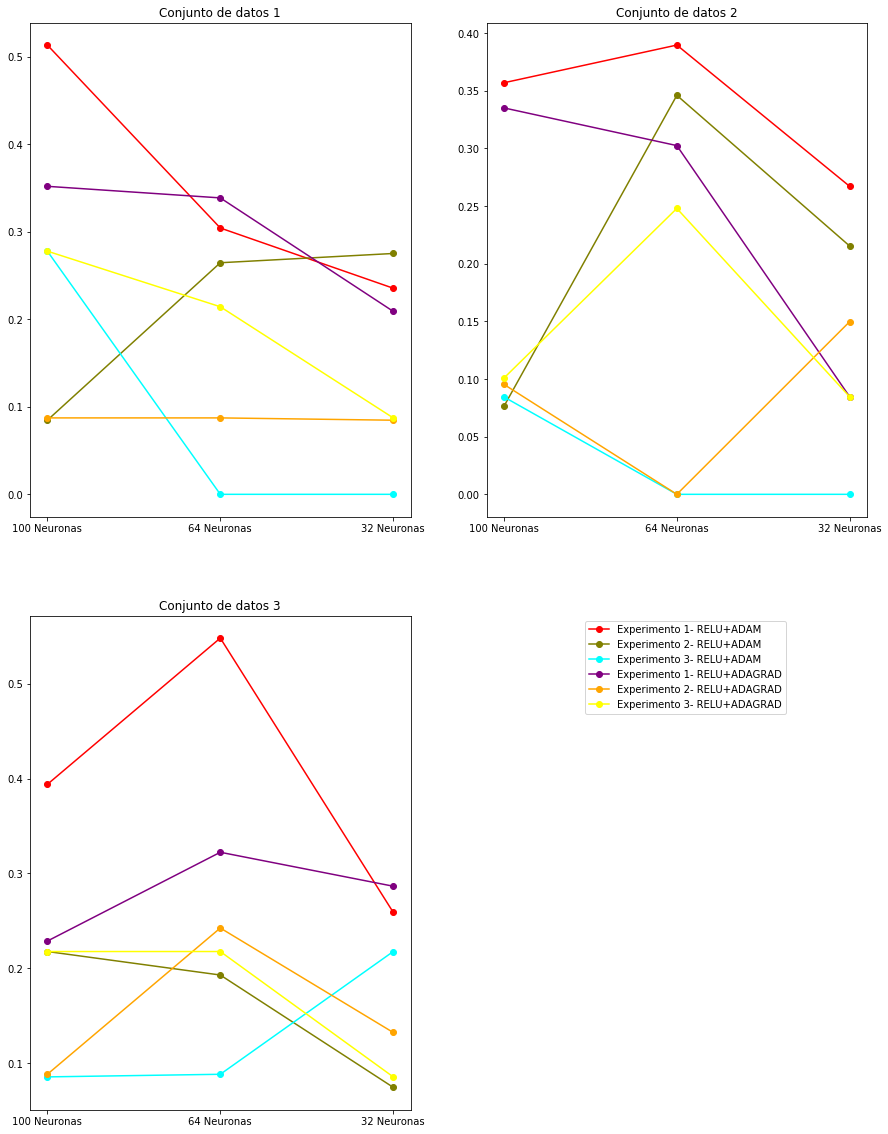

In [12]:
fig = plt.figure(figsize=(15,20))
fig.add_subplot(2,2,1)
plt.plot(df1.loc['Experimento 1- RELU+ADAM'],'o-',label ='Experimento 1- RELU+ADAM',color ='red')
plt.plot(df1.loc['Experimento 2- RELU+ADAM'],'o-',label ='Experimento 2- RELU+ADAM',color ='olive')
plt.plot(df1.loc['Experimento 3- RELU+ADAM'],'o-',label ='Experimento 3- RELU+ADAM',color ='cyan')
plt.plot(df1.loc['Experimento 1- RELU+ADAGRAD'],'o-',label ='Experimento 1- RELU+ADAGRAD',color ='purple')
plt.plot(df1.loc['Experimento 2- RELU+ADAGRAD'],'o-',label ='Experimento 2- RELU+ADAGRAD',color ='orange')
plt.plot(df1.loc['Experimento 3- RELU+ADAGRAD'],'o-',label ='Experimento 3- RELU+ADAGRAD',color ='yellow')
plt.title('Conjunto de datos 1')
fig.add_subplot(2,2,2)
plt.plot(df2.loc['Experimento 1- RELU+ADAM'],'o-',label ='Experimento 1- RELU+ADAM' ,color ='red')
plt.plot(df2.loc['Experimento 2- RELU+ADAM'],'o-',label ='Experimento 2- RELU+ADAM',color ='olive')
plt.plot(df2.loc['Experimento 3- RELU+ADAM'],'o-',label ='Experimento 3- RELU+ADAM',color ='cyan')
plt.plot(df2.loc['Experimento 1- RELU+ADAGRAD'],'o-',label ='Experimento 1- RELU+ADAGRAD',color ='purple')
plt.plot(df2.loc['Experimento 2- RELU+ADAGRAD'],'o-',label ='Experimento 2- RELU+ADAGRAD',color ='orange')
plt.plot(df2.loc['Experimento 3- RELU+ADAGRAD'],'o-',label ='Experimento 3- RELU+ADAGRAD',color ='yellow')
plt.title('Conjunto de datos 2')
fig.add_subplot(2,2,3)
plt.plot(df3.loc['Experimento 1- RELU+ADAM'],'o-',label ='Experimento 1- RELU+ADAM',color ='red')
plt.plot(df3.loc['Experimento 2- RELU+ADAM'],'o-',label ='Experimento 2- RELU+ADAM',color ='olive')
plt.plot(df3.loc['Experimento 3- RELU+ADAM'],'o-',label ='Experimento 3- RELU+ADAM',color ='cyan')
plt.plot(df3.loc['Experimento 1- RELU+ADAGRAD'],'o-',label ='Experimento 1- RELU+ADAGRAD',color ='purple')
plt.plot(df3.loc['Experimento 2- RELU+ADAGRAD'],'o-',label ='Experimento 2- RELU+ADAGRAD',color ='orange')
plt.plot(df3.loc['Experimento 3- RELU+ADAGRAD'],'o-',label ='Experimento 3- RELU+ADAGRAD',color ='yellow')
plt.title('Conjunto de datos 3')
plt.legend(bbox_to_anchor = (2, 1))